In [14]:
!pip install pandas
!pip install matplotlib
!pip install torch
!pip install missingno
!pip install scikit-learn

  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [35]:
# requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import training data

In [2]:
# import dataset
airbnb_train = pd.read_csv("train.csv")

In [84]:
airbnb_train.iloc[:,:11]

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate
0,Bed-Stuy 2 Bed/2 Bath - Renovated,"Welcome to Bed-Stuy, Brooklyn! Our newly renov...",Entire rental unit,4,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,2015-05-23 00:00:00,within a day,100.0
1,Victorian Flatbush Oasis,"Lovely nonsmoking annex in Brooklyn's ""secret ...",Private room in rental unit,3,Flatbush,Brooklyn,40.638991,-73.965739,2023-09-14 00:00:00,within an hour,100.0
2,Bay Ridge Metroscape: Inviting NYC Studio Living,This studio presents unparalleled convenience ...,Entire rental unit,3,Fort Hamilton,Brooklyn,40.618810,-74.032380,2022-07-31 00:00:00,within an hour,100.0
3,"New HDTV room, 20 minutes to Manhattan #724",- Furnished room in a newly renovated apartmen...,Private room in rental unit,0,Crown Heights,Brooklyn,40.673970,-73.953990,2012-08-11 00:00:00,within an hour,99.0
4,Just What You Were Looking For! Pets Allowed,This modern property in Manhattan is just step...,Room in hotel,2,Midtown,Manhattan,40.747180,-73.985390,2014-12-23 00:00:00,within an hour,93.0
...,...,...,...,...,...,...,...,...,...,...,...
15691,Studio Bunk Sky | Placemakr Wall Street,Don’t be deceived by this studio bunk. This sp...,Room in aparthotel,5,Financial District,Manhattan,40.704777,-74.006425,2021-08-27 00:00:00,within an hour,99.0
15692,Riverdale Room,Private room in Riverdale. Here you can enjoy ...,Private room in condo,0,Kingsbridge,Bronx,40.881490,-73.910130,2018-07-22 00:00:00,within an hour,100.0
15693,One Bedroom Deluxe Suite - Monthly Stay,Stay in an upscale place that’s near everythin...,Room in hotel,5,Midtown,Manhattan,40.765440,-73.976508,2018-03-06 00:00:00,within an hour,100.0
15694,"Blueground | West Village, w/d, nr restaurants",Show up and start living from day one in Downt...,Entire rental unit,5,West Village,Manhattan,40.735635,-74.005740,2016-12-16 00:00:00,within an hour,100.0


In [107]:
airbnb_train.iloc[:,11:21]

,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,100.0,True,2.0,2.0,"['email', 'phone']",True,True,1,1,0
1,98.0,True,1.0,1.0,"['email', 'phone']",True,True,1,0,1
2,100.0,False,52.0,55.0,"['email', 'phone']",True,True,52,50,2
3,23.0,False,727.0,1336.0,"['email', 'phone']",True,True,719,0,719
4,95.0,False,707.0,2453.0,"['email', 'phone']",True,True,73,0,0
...,...,...,...,...,...,...,...,...,...,...
15691,99.0,True,15.0,15.0,['phone'],True,True,15,15,0
15692,67.0,False,2.0,2.0,"['email', 'phone']",True,True,2,0,2
15693,98.0,True,28.0,35.0,"['email', 'phone']",True,True,16,10,6
15694,96.0,False,4494.0,4784.0,"['email', 'phone', 'work_email']",True,True,876,876,0


In [108]:
airbnb_train.iloc[:,21:31]

,calculated_host_listings_count_shared_rooms,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,has_availability,availability_30
0,0,Entire home/apt,4,2.0,2 baths,2.0,2.0,"[""Dishwasher"", ""Single level home"", ""Stove"", ""...",True,12
1,0,Private room,2,1.0,1 private bath,1.0,2.0,"[""Dishwasher"", ""Dining table"", ""Mini fridge"", ...",True,10
2,0,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Cleaning products"", ""Elevator"", ""Mini fridge...",True,17
3,0,Private room,1,1.5,1.5 baths,4.0,1.0,"[""Kitchen"", ""Hot water"", ""Dedicated workspace""...",True,0
4,0,Hotel room,2,1.0,1 bath,1.0,1.0,"[""TV"", ""Smoke alarm"", ""Paid parking off premis...",True,4
...,...,...,...,...,...,...,...,...,...,...
15691,0,Entire home/apt,4,1.0,1 bath,1.0,4.0,"[""Elevator"", ""Dining table"", ""Stove"", ""Smoke a...",True,6
15692,0,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Shared patio or balcony"", ""Mosquito net"", ""C...",True,0
15693,0,Private room,3,1.0,1 bath,1.0,1.0,"[""Building staff"", ""Kitchen"", ""Crib"", ""Hair dr...",True,24
15694,0,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Dishwasher"", ""Crib"", ""TV"", ""Smoke alarm"", ""P...",True,0


In [109]:
airbnb_train.iloc[:,31:41]

,availability_60,availability_90,availability_365,instant_bookable,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review
0,42,70,70,False,30,1125,34,5,1,2019-04-28 00:00:00
1,20,49,324,False,1,29,30,30,6,2024-01-13 00:00:00
2,44,70,146,True,1,29,5,5,2,2024-06-27 00:00:00
3,0,0,111,False,30,365,0,0,0,NaN
4,13,22,241,True,1,1125,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
15691,12,22,139,True,1,365,32,13,1,2023-01-15 00:00:00
15692,0,0,216,False,30,1125,6,2,0,2023-04-16 00:00:00
15693,27,57,331,True,1,365,1,0,0,2023-08-21 00:00:00
15694,0,0,247,False,31,1125,0,0,0,NaN


In [110]:
airbnb_train.iloc[:,41:]

,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews
0,2024-08-10 00:00:00,5.00,5.00,4.97,5.00,5.00,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern..."
1,2024-09-02 00:00:00,4.83,4.87,4.93,4.80,4.90,4.90,4.63,3.81,I booked this place last minute to attend a fu...
2,2024-08-17 00:00:00,4.60,4.80,4.20,4.80,4.80,4.80,4.20,2.14,Great spot! Little far out but overall a great...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15691,2024-08-14 00:00:00,4.94,4.94,4.91,4.97,4.81,5.00,4.72,1.60,Thank you\n---------------------------------\n...
15692,2023-11-18 00:00:00,4.33,4.33,4.17,4.17,4.33,4.00,4.33,0.35,Reserved this Airbnb and the host never got ba...
15693,2023-08-21 00:00:00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.08,amazing experience. incredible location. staff...
15694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
print(airbnb_train.shape)
print(airbnb_train.dtypes)

(15696, 51)
name                                             object
description                                      object
property_type                                    object
price                                             int64
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
host_since                                       object
host_response_time                               object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                               bool
host_identity_verified              

### Pre-processing data

name                                            0.000000
description                                     0.024656
property_type                                   0.000000
price                                           0.000000
neighbourhood_cleansed                          0.000000
neighbourhood_group_cleansed                    0.000000
latitude                                        0.000000
longitude                                       0.000000
host_since                                      0.000000
host_response_time                              0.140354
host_response_rate                              0.140354
host_acceptance_rate                            0.130798
host_is_superhost                               0.015991
host_listings_count                             0.000000
host_total_listings_count                       0.000000
host_verifications                              0.000000
host_has_profile_pic                            0.000000
host_identity_verified         

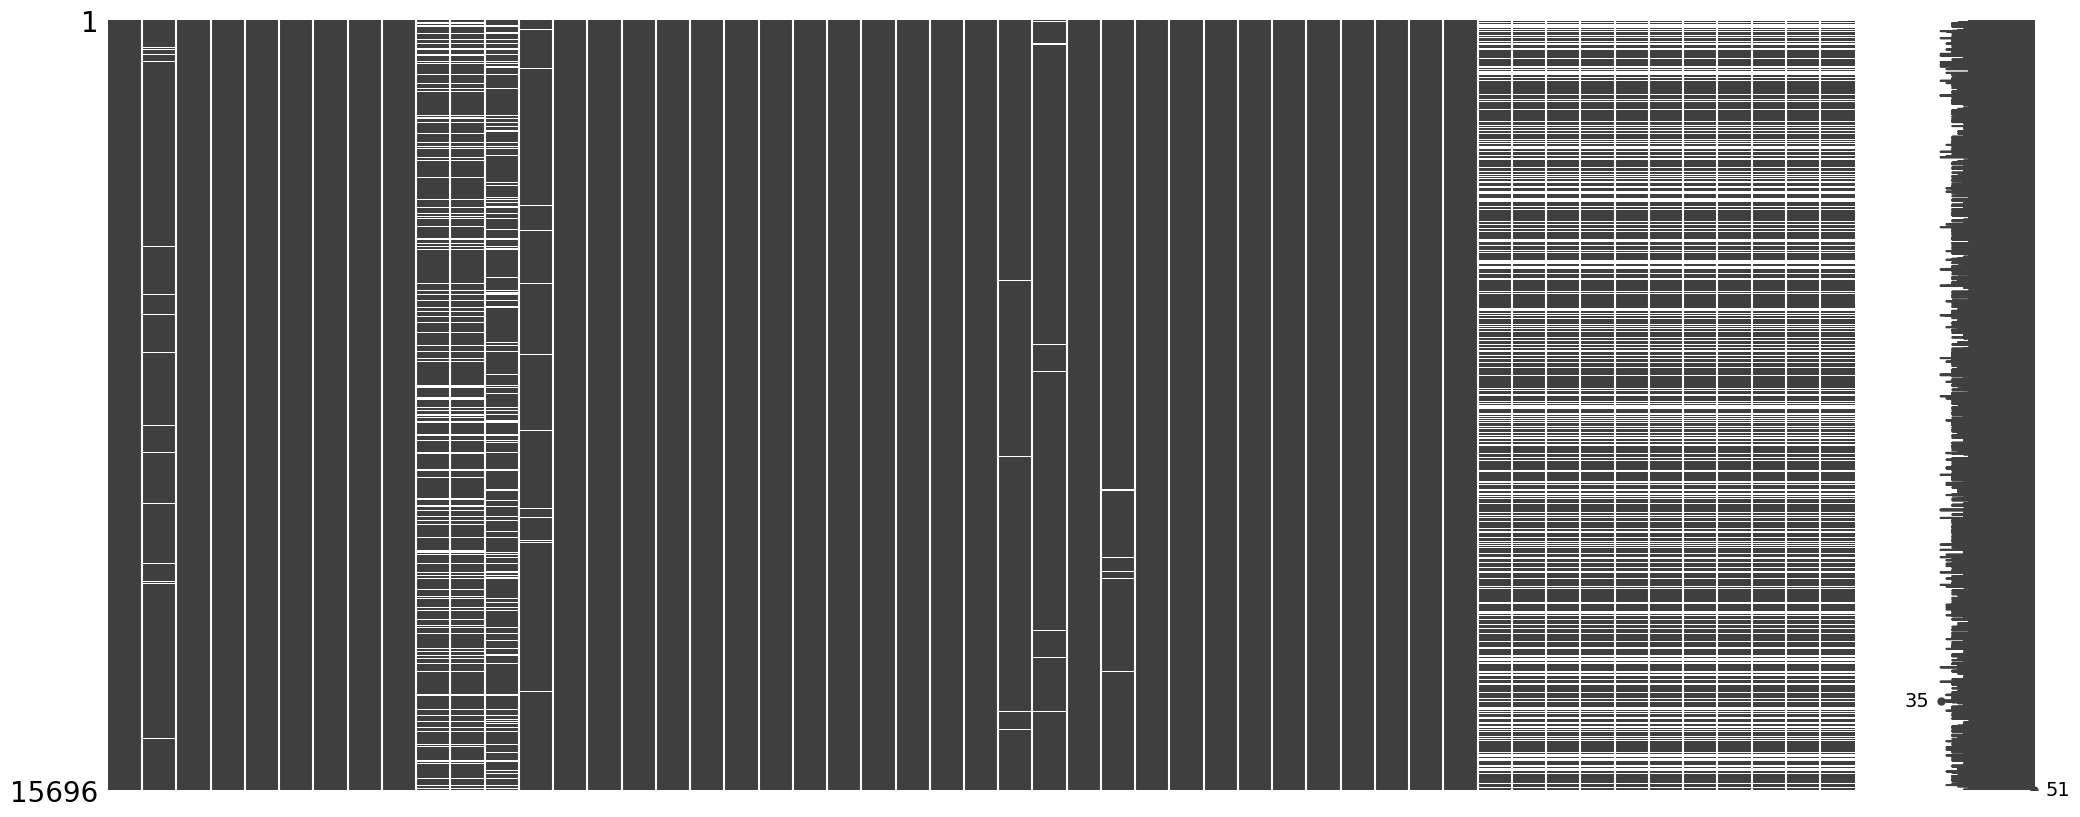

In [3]:
# check missing values
import missingno as msno
msno.matrix(airbnb_train)
airbnb_train.isna().mean()

In [4]:
# examine missing beds
beds_known = airbnb_train[airbnb_train['beds'].notna()]
beds_missing = airbnb_train[airbnb_train['beds'].isna()]
print(beds_missing[['beds', 'accommodates']])

corr = airbnb_train['beds'].corr(airbnb_train['accommodates'])
print(corr)

       beds  accommodates
30      NaN             2
218     NaN             2
231     NaN             2
479     NaN             1
499     NaN             2
...     ...           ...
14704   NaN             4
14721   NaN             6
15002   NaN             2
15109   NaN             2
15660   NaN             2

[84 rows x 2 columns]
0.7340312536569265


Since number of beds is strongly correlated with the number of people the property accommodates, we can impute the number of beds by fitting a linear regression model to the number of beds and the number of people the property accommodates.

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(beds_known[['accommodates']], beds_known['beds'])
airbnb_train.loc[airbnb_train['beds'].isna(), 'beds'] = model.predict(beds_missing[['accommodates']])

In [6]:
# examine missing reviews
reviews_missing = airbnb_train[airbnb_train["number_of_reviews"]==0]
# reviews_missing.isna().mean()
reviews_present = airbnb_train[airbnb_train["number_of_reviews"]!=0]
reviews_present.isna().mean()

name                                            0.000000
description                                     0.023347
property_type                                   0.000000
price                                           0.000000
neighbourhood_cleansed                          0.000000
neighbourhood_group_cleansed                    0.000000
latitude                                        0.000000
longitude                                       0.000000
host_since                                      0.000000
host_response_time                              0.135003
host_response_rate                              0.135003
host_acceptance_rate                            0.109606
host_is_superhost                               0.018357
host_listings_count                             0.000000
host_total_listings_count                       0.000000
host_verifications                              0.000000
host_has_profile_pic                            0.000000
host_identity_verified         

For the missing values related to reviews, almost all missing review scores (except very few data points for review_scores_location) were due to that particular airBnB having no reviews (number_of_reviews==0). Thus, I create a binary variable "has_reviews" to indicate whether the airBnB has received any reviews. For airBnBs that have received reviews, I consider the number_of_reviews variable, as well as the specific review scores.

In [7]:
# convert reviews variables
airbnb_train['has_reviews'] = (airbnb_train['number_of_reviews'] > 0).astype(int)
airbnb_train['has_reviews'].value_counts()
airbnb_train_with_reviews = airbnb_train[airbnb_train['has_reviews']==1]
review_columns = [col for col in airbnb_train.columns if 'review' in col]
with_reviews = airbnb_train_with_reviews[review_columns]
with_reviews.head()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews,has_reviews
0,34,5,1,2019-04-28 00:00:00,2024-08-10 00:00:00,5.00,5.00,4.97,5.00,5.00,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern...",1
1,30,30,6,2024-01-13 00:00:00,2024-09-02 00:00:00,4.83,4.87,4.93,4.80,4.90,4.90,4.63,3.81,I booked this place last minute to attend a fu...,1
2,5,5,2,2024-06-27 00:00:00,2024-08-17 00:00:00,4.60,4.80,4.20,4.80,4.80,4.80,4.20,2.14,Great spot! Little far out but overall a great...,1
5,102,2,1,2017-09-18 00:00:00,2024-08-17 00:00:00,4.80,4.79,4.80,4.95,4.97,4.83,4.69,1.20,Beautiful back yard and great location by the ...,1
6,11,11,2,2024-06-12 00:00:00,2024-08-16 00:00:00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3.88,"Hosts were very gracious, accommodating, and f...",1


In [8]:
# impute missing review score values
for col in review_columns:
    if col=='number_of_reviews' or col=='number_of_reviews_ltm' or col=='number_of_reviews_l30d' or col=='reviews_per_month':
        airbnb_train[col] = airbnb_train[col].fillna(0)
    elif isinstance(airbnb_train[col][0], int) or isinstance(airbnb_train[col][0], float):
        airbnb_train[col] = airbnb_train[col].fillna(airbnb_train[col].median())
    elif isinstance(airbnb_train[col][0], str):
        airbnb_train[col] = airbnb_train[col].fillna("")
airbnb_train[review_columns]

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews,has_reviews
0,34,5,1,2019-04-28 00:00:00,2024-08-10 00:00:00,5.00,5.00,4.97,5.00,5.00,4.71,4.94,0.52,"Barry's place was perfect. It was cute, modern...",1
1,30,30,6,2024-01-13 00:00:00,2024-09-02 00:00:00,4.83,4.87,4.93,4.80,4.90,4.90,4.63,3.81,I booked this place last minute to attend a fu...,1
2,5,5,2,2024-06-27 00:00:00,2024-08-17 00:00:00,4.60,4.80,4.20,4.80,4.80,4.80,4.20,2.14,Great spot! Little far out but overall a great...,1
3,0,0,0,,,4.85,4.88,4.82,4.94,4.94,4.82,4.75,0.00,,0
4,0,0,0,,,4.85,4.88,4.82,4.94,4.94,4.82,4.75,0.00,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,32,13,1,2023-01-15 00:00:00,2024-08-14 00:00:00,4.94,4.94,4.91,4.97,4.81,5.00,4.72,1.60,Thank you\n---------------------------------\n...,1
15692,6,2,0,2023-04-16 00:00:00,2023-11-18 00:00:00,4.33,4.33,4.17,4.17,4.33,4.00,4.33,0.35,Reserved this Airbnb and the host never got ba...,1
15693,1,0,0,2023-08-21 00:00:00,2023-08-21 00:00:00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.08,amazing experience. incredible location. staff...,1
15694,0,0,0,,,4.85,4.88,4.82,4.94,4.94,4.82,4.75,0.00,,0


(2879, 4)

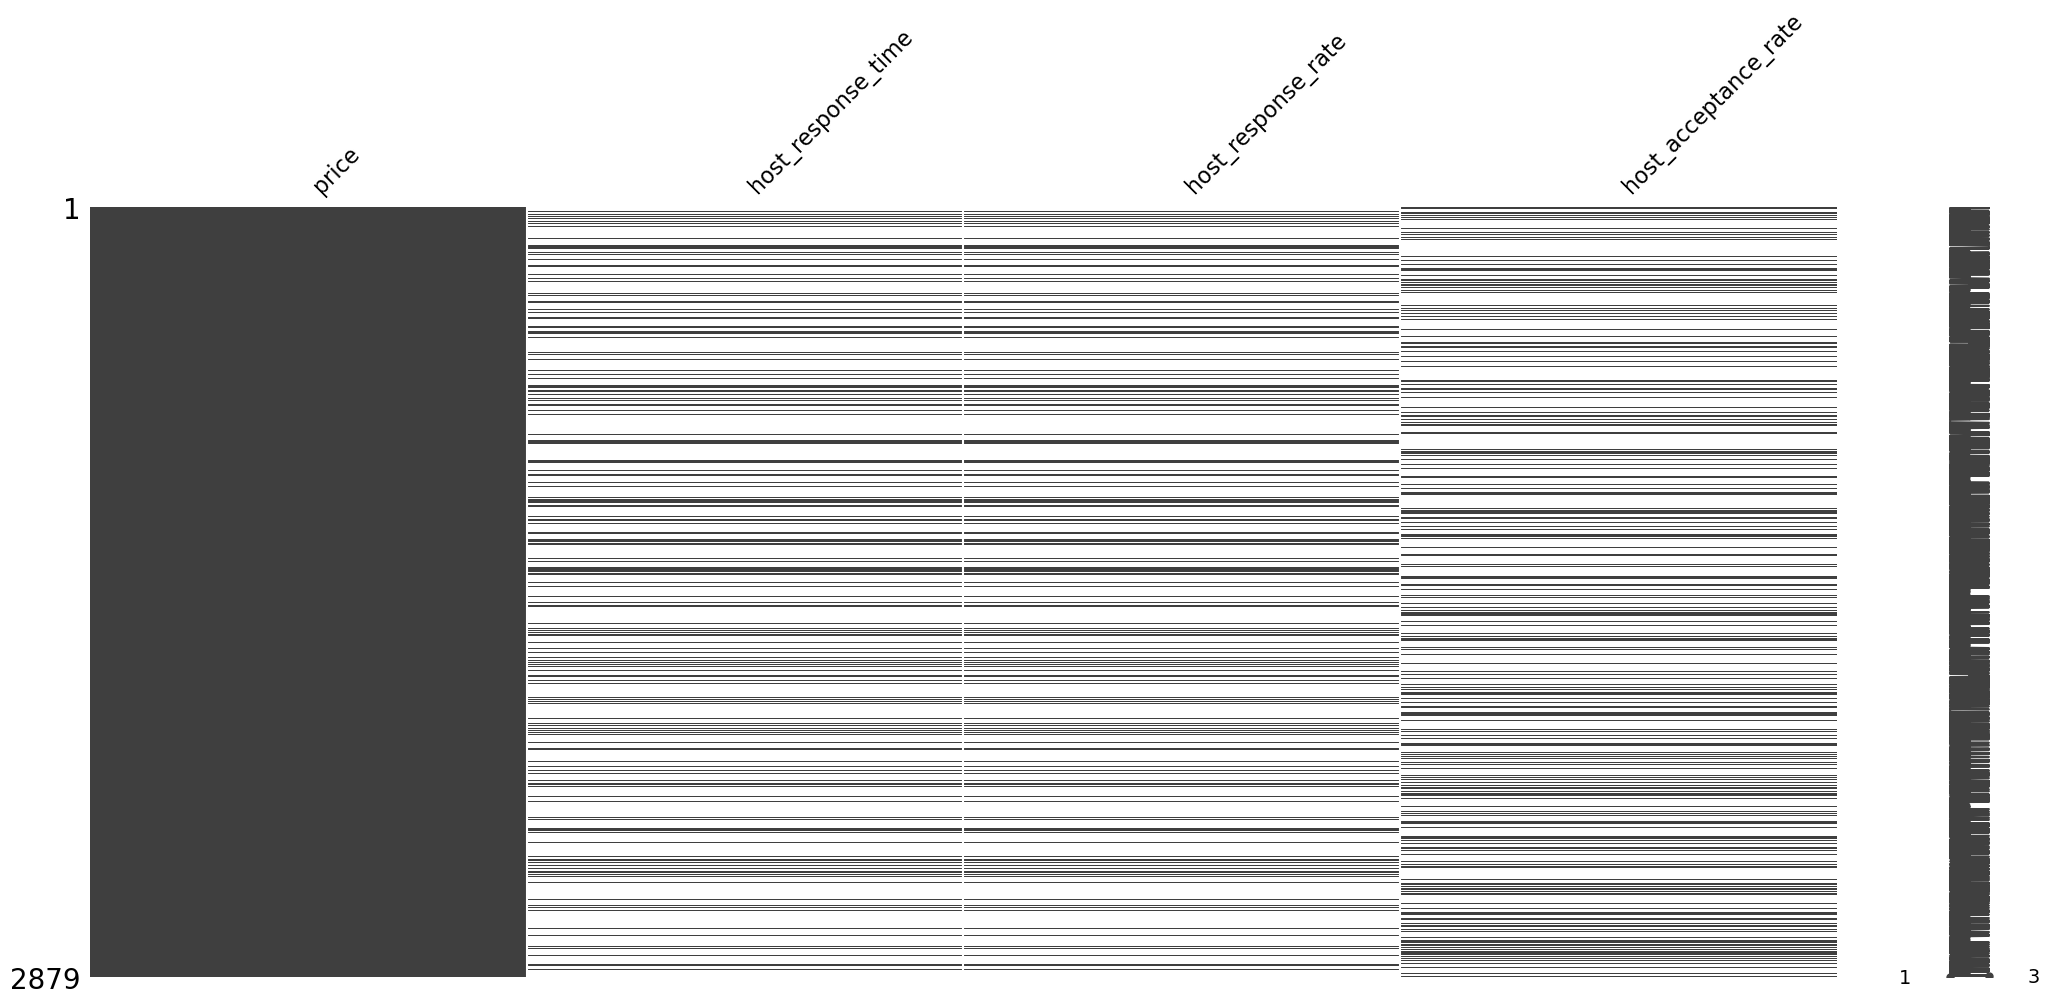

In [9]:
# deal with missing values in host_response_time, host_response_rate, host_acceptance_rate
host_interaction_nan = airbnb_train[airbnb_train[['host_response_time','host_response_rate','host_acceptance_rate']].isna().any(axis=1)]
host_interaction_nan_filtered = host_interaction_nan[['price','host_response_time','host_response_rate','host_acceptance_rate']]
msno.matrix(host_interaction_nan_filtered)
host_interaction_nan_filtered.shape

In [10]:
corr = airbnb_train['host_acceptance_rate'].corr(airbnb_train['host_response_rate'])
print(corr)
both_nan = host_interaction_nan_filtered[host_interaction_nan_filtered[['host_response_time','host_acceptance_rate','host_response_rate']].isna().all(axis=1)]
print(both_nan)

0.44030024670168594
       price host_response_time  host_response_rate  host_acceptance_rate
32         3                NaN                 NaN                   NaN
65         2                NaN                 NaN                   NaN
69         0                NaN                 NaN                   NaN
79         3                NaN                 NaN                   NaN
89         5                NaN                 NaN                   NaN
...      ...                ...                 ...                   ...
15665      3                NaN                 NaN                   NaN
15670      3                NaN                 NaN                   NaN
15672      4                NaN                 NaN                   NaN
15675      5                NaN                 NaN                   NaN
15690      0                NaN                 NaN                   NaN

[1377 rows x 4 columns]


In [11]:
print(host_interaction_nan['host_response_time'].value_counts())

host_response_time
a few days or more    258
within a day          175
within an hour        131
within a few hours    112
Name: count, dtype: int64


Since the data is missing at random, we can use Multivariate Imputation by Chained Equations (MICE) to impute the missing values.

In [12]:
# mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ['host_response_time', 'host_response_rate', 'host_acceptance_rate']

ordinal_mapping = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}
airbnb_train['host_response_time'] = airbnb_train['host_response_time'].map(ordinal_mapping)

mice_imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_airbnb_train = mice_imputer.fit_transform(airbnb_train[columns_to_impute])

airbnb_train[columns_to_impute] = imputed_airbnb_train

reverse_mapping = {v: k for k, v in ordinal_mapping.items()}
airbnb_train['host_response_time'] = airbnb_train['host_response_time'].round().map(reverse_mapping)


In [13]:
# amenities count
airbnb_train['amenities_count'] = airbnb_train['amenities'].apply(lambda x: len(x))
amenities_counts = airbnb_train['amenities_count'].value_counts()
amenities_counts

amenities_count
95      139
117      93
85       80
468      74
207      65
       ... 
1501      1
1234      1
1864      1
1259      1
1429      1
Name: count, Length: 1421, dtype: int64

In [14]:
from datetime import datetime

from numpy import NaN

def convert_date_to_timesince(old_col, new_col):
    for i in range(len(old_col)):
        date = old_col[i]
        try:
            date_obj = datetime.strptime(str(date), "%Y-%m-%d %H:%M:%S")
            today = datetime.strptime("2024-11-26 00:00:00", "%Y-%m-%d %H:%M:%S")
            time_difference = today - date_obj
            years_difference = time_difference.days / 365.25
            new_col[i] = round(years_difference,2)
        except:
            new_col[i] = NaN
    return new_col

def convert_date_to_year(old_col, new_col):
    for i in range(len(old_col)):
        date = old_col[i]
        if (date==NaN):
            continue
        date_obj = datetime.strptime(str(date), "%Y-%m-%d %H:%M:%S")
        today = datetime.strptime("2024-11-26 00:00:00", "%Y-%m-%d %H:%M:%S")
        years_difference = today.year - date_obj.year
        if (today.month, today.day) < (date_obj.month, date_obj.day):
            years_difference -= 1
        new_col[i] = years_difference
    return new_col

In [15]:
# convert host_since
host_time = [0]*len(airbnb_train['host_since'])
host_since = airbnb_train['host_since']

host_time = convert_date_to_timesince(host_since, host_time)
airbnb_train['host_time'] = host_time
print(airbnb_train['host_time'])

host_years = convert_date_to_year(host_since, host_time)
airbnb_train['host_years'] = host_time
print(airbnb_train['host_years'])


0         9.51
1         1.20
2         2.32
3        12.29
4         9.93
         ...  
15691     3.25
15692     6.35
15693     6.73
15694     7.95
15695     4.37
Name: host_time, Length: 15696, dtype: float64
0         9
1         1
2         2
3        12
4         9
         ..
15691     3
15692     6
15693     6
15694     7
15695     4
Name: host_years, Length: 15696, dtype: int64


In [16]:
# convert first / last review
first_time = [0]*len(airbnb_train['first_review'])
first_review = airbnb_train['first_review']

first_time = convert_date_to_timesince(first_review, first_time)
airbnb_train['first_review_time'] = first_time

last_time = [0]*len(airbnb_train['last_review'])
last_review = airbnb_train['last_review']

last_time = convert_date_to_timesince(last_review, last_time)
airbnb_train['last_review_time'] = last_time

# impute missing values
airbnb_train['first_review_time'] = airbnb_train['first_review_time'].fillna(airbnb_train['first_review_time'].mean())
airbnb_train['last_review_time'] = airbnb_train['last_review_time'].fillna(airbnb_train['last_review_time'].mean())
print(airbnb_train['first_review_time'])
print(airbnb_train['last_review_time'])

# calculate time difference
airbnb_train['review_time_difference'] = airbnb_train['first_review_time'] - airbnb_train['last_review_time']

0        5.580000
1        0.870000
2        0.420000
3        3.800911
4        3.800911
           ...   
15691    1.860000
15692    1.620000
15693    1.270000
15694    3.800911
15695    4.070000
Name: first_review_time, Length: 15696, dtype: float64
0        0.300000
1        0.230000
2        0.280000
3        1.053767
4        1.053767
           ...   
15691    0.280000
15692    1.020000
15693    1.270000
15694    1.053767
15695    1.350000
Name: last_review_time, Length: 15696, dtype: float64


In [17]:
# calculate entire_homes_ratio, the ratio of entire_homes to total_listings
airbnb_train['entire_homes_ratio'] = airbnb_train['calculated_host_listings_count_entire_homes'] / airbnb_train['calculated_host_listings_count']
print(airbnb_train['entire_homes_ratio'])

# calculate private_rooms_ratio, the ratio of private_rooms to total_listings
airbnb_train['private_rooms_ratio'] = airbnb_train['calculated_host_listings_count_private_rooms'] / airbnb_train['calculated_host_listings_count']

0        1.000000
1        0.000000
2        0.961538
3        0.000000
4        0.000000
           ...   
15691    1.000000
15692    0.000000
15693    0.625000
15694    1.000000
15695    0.000000
Name: entire_homes_ratio, Length: 15696, dtype: float64


In [16]:
min = airbnb_train['review_scores_rating'].min()
max = airbnb_train['review_scores_rating'].max()
print(f"range of review_scores_rating: {min} to {max}")

range of review_scores_rating: 1.0 to 5.0


In [18]:
# scale review scores
review_scores = [col for col in airbnb_train.columns if col.startswith('review_scores')]
for col in review_scores:
    new_col_name = f"{col}_scaled"
    airbnb_train[new_col_name] = airbnb_train[col] * 10 
airbnb_train['review_scores_rating_scaled']

0        50.0
1        48.3
2        46.0
3        48.5
4        48.5
         ... 
15691    49.4
15692    43.3
15693    50.0
15694    48.5
15695    48.1
Name: review_scores_rating_scaled, Length: 15696, dtype: float64

#### Add in columns for top 7 property types

In [19]:
# add in columns for property type
airbnb_train_processed = pd.read_csv('train_augmented_full.csv')
airbnb_test_processed = pd.read_csv('test_augmented_full.csv')
common_types = set(airbnb_train_processed['property_type'].unique()).intersection(airbnb_test_processed['property_type'].unique())

In [20]:
print(len(common_types))
train_filtered = airbnb_train_processed[airbnb_train_processed['property_type'].isin(common_types)]
test_filtered = airbnb_test_processed[airbnb_test_processed['property_type'].isin(common_types)]
train_value_counts = train_filtered['property_type'].value_counts()
test_value_counts = test_filtered['property_type'].value_counts()
print(train_value_counts, test_value_counts)

46
property_type
Entire rental unit                    6516
Private room in rental unit           3943
Private room in home                  1295
Entire home                            716
Private room in townhouse              480
Entire condo                           474
Room in hotel                          432
Private room in condo                  236
Entire townhouse                       216
Entire guest suite                     195
Entire loft                            172
Entire serviced apartment              144
Room in boutique hotel                 124
Shared room in rental unit             112
Private room in serviced apartment      99
Private room in guest suite             87
Private room in loft                    55
Entire place                            46
Private room in bed and breakfast       40
Room in aparthotel                      39
Private room in casa particular         31
Shared room in home                     31
Entire guesthouse                    

In [21]:
# create one-hot encoding for each property type in training data
airbnb_train_processed['is_entire_rental_unit'] = (airbnb_train_processed['property_type'] == 'Entire rental unit').astype(int)
airbnb_train_processed['is_private_room_in_rental_unit'] = (airbnb_train_processed['property_type'] == 'Private room in rental unit').astype(int)
airbnb_train_processed['is_private_room_in_home'] = (airbnb_train_processed['property_type'] == 'Private room in home').astype(int)
airbnb_train_processed['is_entire_home'] = (airbnb_train_processed['property_type'] == 'Entire home').astype(int)
airbnb_train_processed['is_private_room_in_townhouse'] = (airbnb_train_processed['property_type'] == 'Private room in townhouse').astype(int)
airbnb_train_processed['is_private_room_in_hotel'] = (airbnb_train_processed['property_type'] == 'Room in hotel').astype(int)
airbnb_train_processed['is_entire_condo'] = (airbnb_train_processed['property_type'] == 'Entire condo').astype(int)

In [22]:
# create one-hot encoding for each property type in test data
airbnb_test_processed['is_entire_rental_unit'] = (airbnb_test_processed['property_type'] == 'Entire rental unit').astype(int)
airbnb_test_processed['is_private_room_in_rental_unit'] = (airbnb_test_processed['property_type'] == 'Private room in rental unit').astype(int)
airbnb_test_processed['is_private_room_in_home'] = (airbnb_test_processed['property_type'] == 'Private room in home').astype(int)
airbnb_test_processed['is_entire_home'] = (airbnb_test_processed['property_type'] == 'Entire home').astype(int)
airbnb_test_processed['is_private_room_in_townhouse'] = (airbnb_test_processed['property_type'] == 'Private room in townhouse').astype(int)
airbnb_test_processed['is_private_room_in_hotel'] = (airbnb_test_processed['property_type'] == 'Room in hotel').astype(int)
airbnb_test_processed['is_entire_condo'] = (airbnb_test_processed['property_type'] == 'Entire condo').astype(int)

#### Add distance to Times Square

Time Square is the most visited place in NYC by tourists. The vicinity of the property to Times Square could be a significant factor in the property's value.

In [23]:
import math

def haversine_distance(lat1, lon1, lat2=40.7580, lon2=-73.9855):
    """
    Calculate the great-circle distance between two points on the Earth using the Haversine formula.
    Inputs:
        lat1, lon1: Latitude and Longitude of the first location in decimal degrees.
        lat2, lon2: Latitude and Longitude of Times Square (default: 40.7580, -73.9855).
    Output:
        Distance in km.
    """
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of Earth in kilometers
    radius_earth_km = 6371

    # Compute the distance
    distance = radius_earth_km * c
    return distance


In [24]:
airbnb_train_processed["distance_to_times_square"] = airbnb_train_processed.apply(lambda row: haversine_distance(row["latitude"], row["longitude"]), axis=1)
airbnb_test_processed["distance_to_times_square"] = airbnb_test_processed.apply(lambda row: haversine_distance(row["latitude"], row["longitude"]), axis=1)
print(airbnb_test_processed["distance_to_times_square"].head())

0    6.981771
1    4.284568
2    9.658532
3    4.359480
4    5.551326
Name: distance_to_times_square, dtype: float64


In [25]:
#impute missing values of bathrooms and bedrooms with mean
airbnb_train_processed['bathrooms'] = airbnb_train_processed['bathrooms'].fillna(airbnb_train_processed['bathrooms'].mean())
airbnb_train_processed['bedrooms'] = airbnb_train_processed['bedrooms'].fillna(airbnb_train_processed['bedrooms'].mean())

### EDA

#### Distance to Times Square

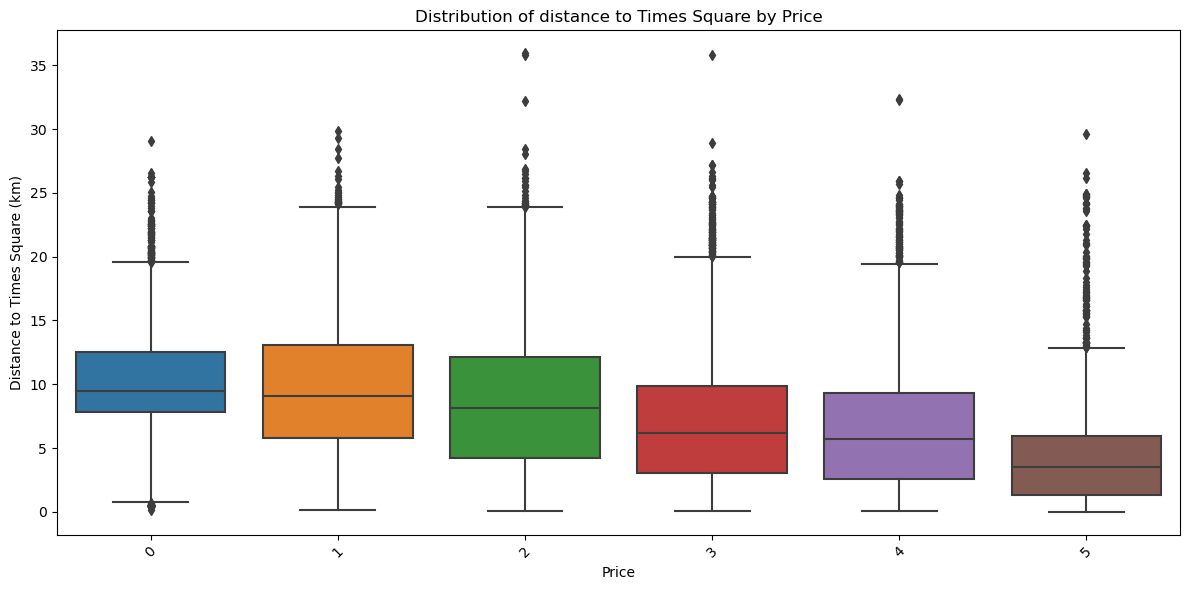

In [27]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='distance_to_times_square', data=airbnb_train_processed)

plt.title('Distribution of distance to Times Square by Price')
plt.xlabel('Price')
plt.ylabel('Distance to Times Square (km)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [28]:
corr = airbnb_train_processed['distance_to_times_square'].corr(airbnb_train_processed['price'])
print(corr)

-0.35759412357808007


#### Availability

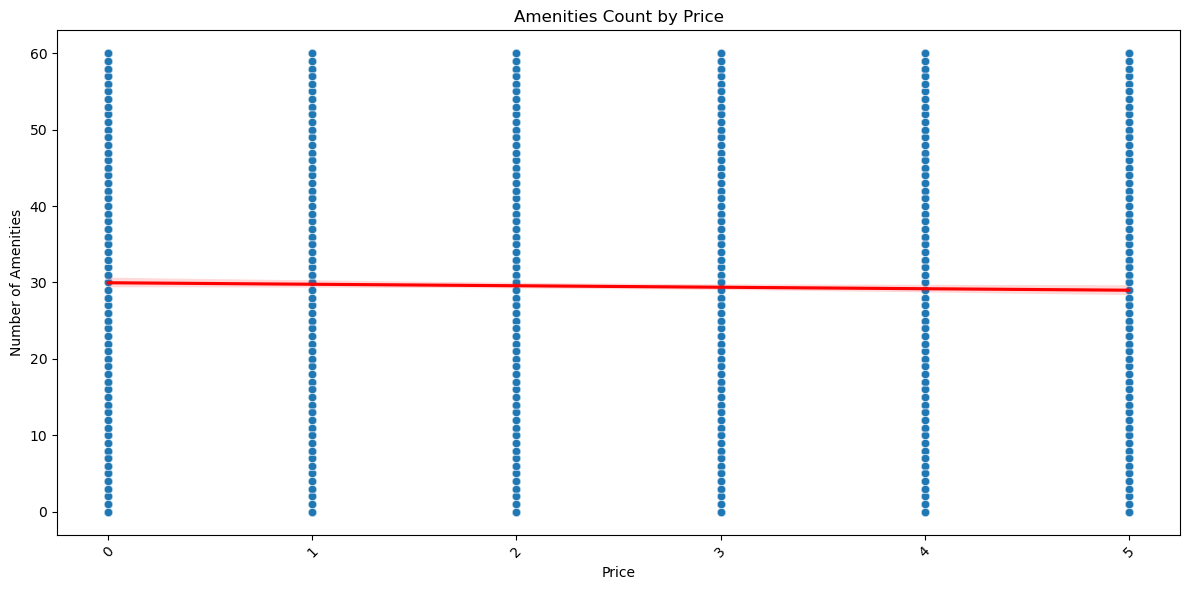

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='availability_60', data=airbnb_train_processed, alpha=0.5)
sns.regplot(x='price', y='availability_60', data=airbnb_train_processed, 
           scatter=False, color='red')

plt.title('Amenities Count by Price')
plt.xlabel('Price')
plt.ylabel('Number of Amenities')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Property Type

In [83]:
print(airbnb_train['property_type'].value_counts())

property_type
Entire rental unit                    6516
Private room in rental unit           3943
Private room in home                  1295
Entire home                            716
Private room in townhouse              480
Entire condo                           474
Room in hotel                          432
Private room in condo                  236
Entire townhouse                       216
Entire guest suite                     195
Entire loft                            172
Entire serviced apartment              144
Room in boutique hotel                 124
Shared room in rental unit             112
Private room in serviced apartment      99
Private room in guest suite             87
Private room in loft                    55
Entire place                            46
Private room in bed and breakfast       40
Room in aparthotel                      39
Private room in casa particular         31
Shared room in home                     31
Entire guesthouse                       

In [124]:
# explore extreme prices
airbnb_train[airbnb_train['price'] == 5]

,name,description,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,...,reviews_clean,reviews_quiet,name_new,name_luxury,name_big,reviews_big,description_luxury,description_big,description_convenient,reviews_luxury
7,"Blueground | UWS, doorman & gym, nr central park",Feel at home wherever you choose to live with ...,Entire rental unit,5,Upper West Side,Manhattan,40.777553,-73.983459,2016-12-16 00:00:00,within an hour,...,0,0,0,0,0,0,0,1,0,0
16,"Large, Sunny Apartment in Lefferts Gardens","Spacious, bright top (2nd) floor apartment wit...",Entire rental unit,5,Prospect-Lefferts Gardens,Brooklyn,40.657580,-73.954320,2019-04-14 00:00:00,within an hour,...,1,1,0,0,1,1,0,1,-1,0
25,Ever-changing artwork & BOCA Terry robes,Double Double rooms offer two full-sized premi...,Room in hotel,5,Lower East Side,Manhattan,40.719765,-73.988102,2023-12-19 00:00:00,within an hour,...,1,0,0,0,0,0,1,0,0,0
30,"Hotel room with Upscale sky lounge, plus gym",Our modern Petite Queen rooms are ideal for in...,Room in hotel,5,Financial District,Manhattan,40.709585,-74.008740,2024-01-25 00:00:00,within an hour,...,0,0,0,1,0,0,1,-1,0,0
36,3 bedrooms apt in Upper West Side!,Bring the whole family or friends to this grea...,Entire rental unit,5,Upper West Side,Manhattan,40.793940,-73.972050,2022-09-23 00:00:00,within an hour,...,1,1,0,0,0,1,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15671,Family Friendly Near Subway Astoria-NYC Home S...,Come Share our home!<br />Gorgeous 900sf recen...,Entire home,5,Ditmars Steinway,Queens,40.777570,-73.915800,2013-07-26 00:00:00,within a few hours,...,1,1,0,0,0,1,0,0,0,1
15675,A lovely studio in the Morris park,Forget your worries in this spacious and seren...,Entire rental unit,5,Van Nest,Bronx,40.847290,-73.861730,2016-02-14 00:00:00,within a few hours,...,1,0,0,0,0,0,0,1,0,0
15691,Studio Bunk Sky | Placemakr Wall Street,Don’t be deceived by this studio bunk. This sp...,Room in aparthotel,5,Financial District,Manhattan,40.704777,-74.006425,2021-08-27 00:00:00,within an hour,...,1,1,0,0,0,1,0,0,0,1
15693,One Bedroom Deluxe Suite - Monthly Stay,Stay in an upscale place that’s near everythin...,Room in hotel,5,Midtown,Manhattan,40.765440,-73.976508,2018-03-06 00:00:00,within an hour,...,0,0,0,0,0,0,1,0,0,0


#### name

In [27]:
# extract info from the name
# new / old
airbnb_train['name_new'] = np.where(
    airbnb_train['name'].str.contains(r'\b((?<!not\s)new|newly|fresh|freshly|renovated|completed)\b', regex=True, case=False), 1,
    np.where(airbnb_train['name'].str.contains(r'\b(old|classic|historic|traditional|vintage|seasoned|retro|rustic|heritage|historical)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['name_new'].value_counts())


name_new
 0    14384
 1     1031
-1      281
Name: count, dtype: int64


/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/198843175.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['name'].str.contains(r'\b((?<!not\s)new|newly|fresh|freshly|renovated|completed)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/198843175.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['name'].str.contains(r'\b(old|classic|historic|traditional|vintage|seasoned|retro|rustic|heritage|historical)\b', regex=True, case=False), -1, 0)


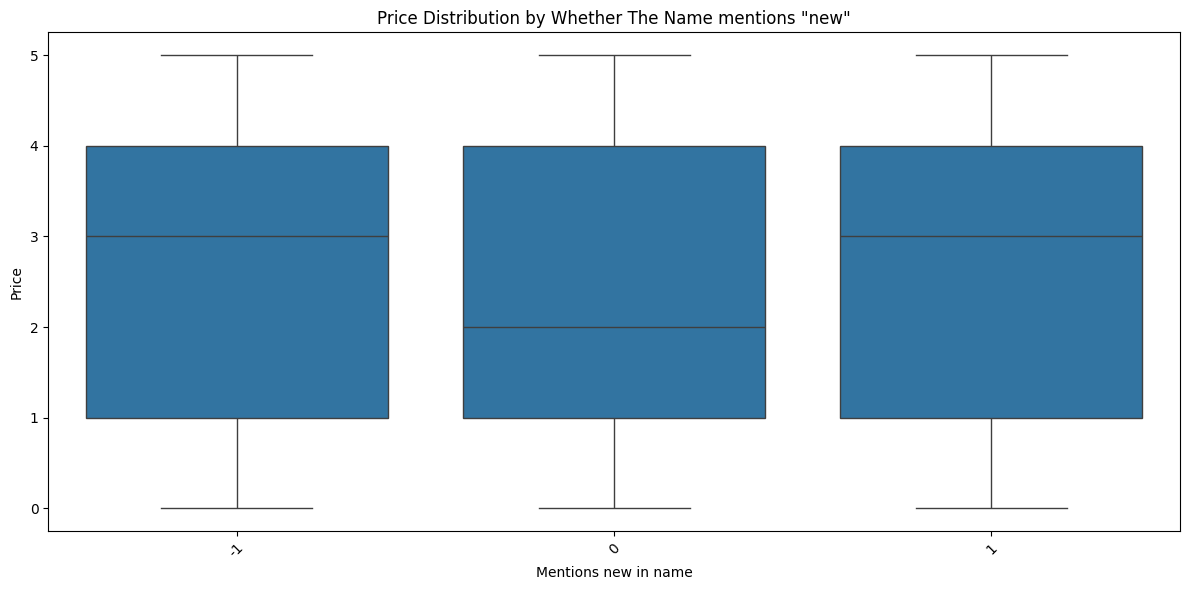

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='name_new', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Name mentions "new"')
plt.xlabel('Mentions new in name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [28]:
# luxury / budget
airbnb_train['name_luxury'] = np.where(
    airbnb_train['name'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
    np.where(airbnb_train['name'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['name_luxury'].value_counts())


name_luxury
 0    14813
 1      736
-1      147
Name: count, dtype: int64


/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/2341710490.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['name'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/2341710490.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['name'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)


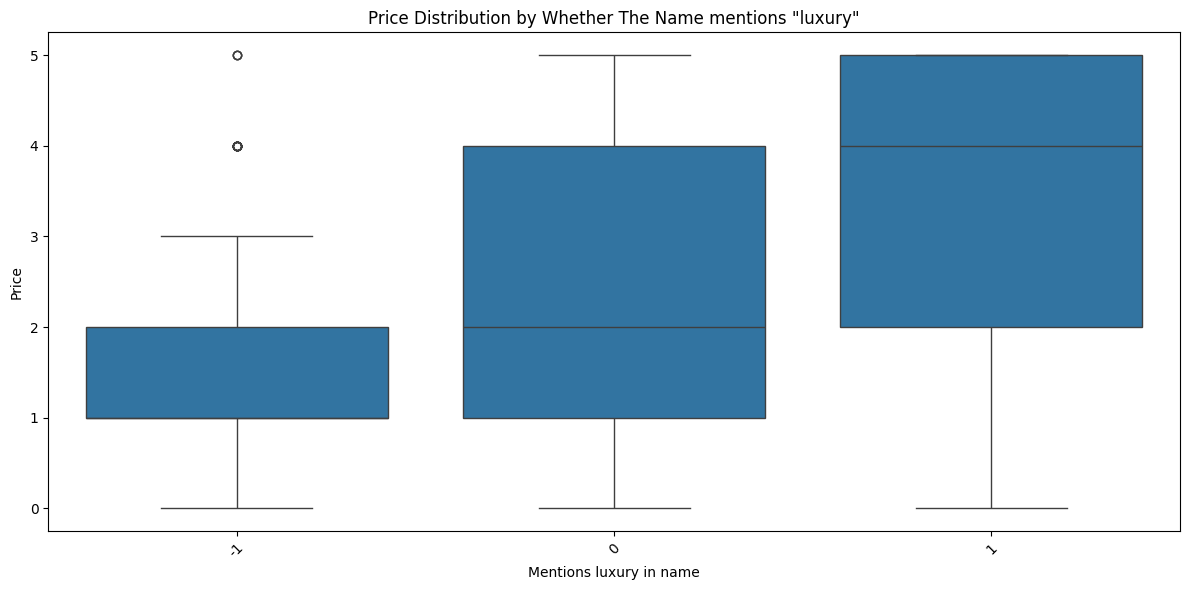

In [104]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='name_luxury', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Name mentions "luxury"')
plt.xlabel('Mentions luxury in name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [29]:
# big / small
airbnb_train['name_big'] = np.where(
    airbnb_train['name'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family|massive|full-sized)\b', regex=True, case=False), 1,
    np.where(airbnb_train['name'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro|individual|one-person|single)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['name_big'].value_counts())

name_big
 0    14091
 1     1476
-1      129
Name: count, dtype: int64


/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/595617723.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['name'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family|massive|full-sized)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/595617723.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['name'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro|individual|one-person|single)\b', regex=True, case=False), -1, 0)


In [30]:
# big / small
airbnb_train['reviews_big'] = np.where(
    airbnb_train['reviews'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family size|massive)\b', regex=True, case=False), 1,
    np.where(airbnb_train['reviews'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['reviews_big'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/2508918993.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['reviews'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family size|massive)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/2508918993.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['reviews'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro)\b', regex=True, case=False), -1, 0)


reviews_big
 0    7761
 1    7130
-1     805
Name: count, dtype: int64


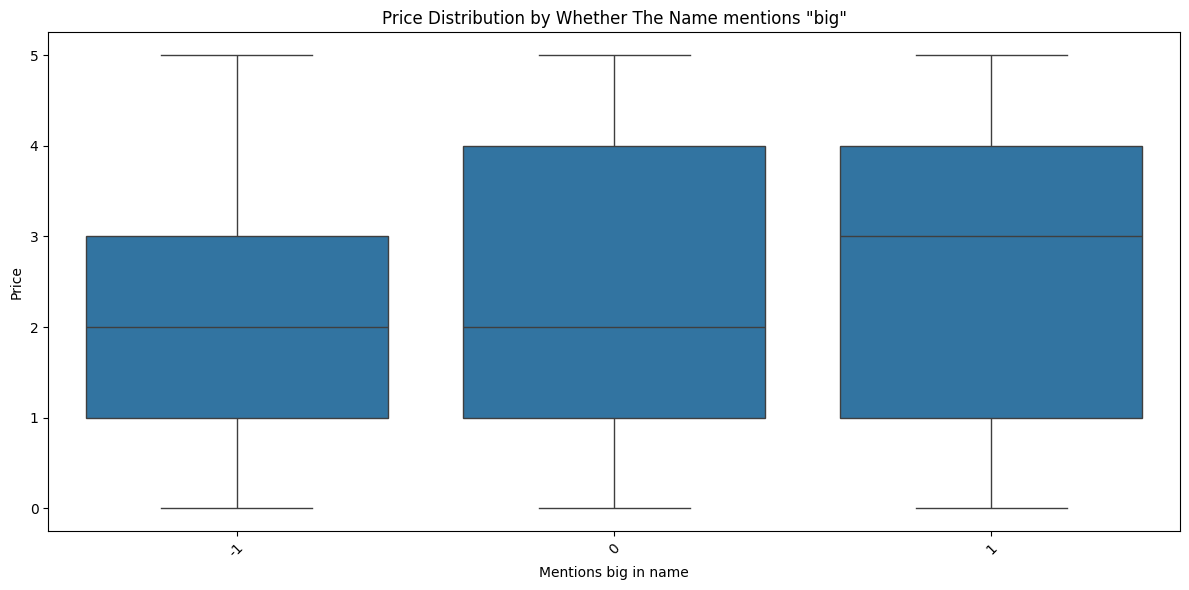

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='reviews_big', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Name mentions "big"')
plt.xlabel('Mentions big in name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

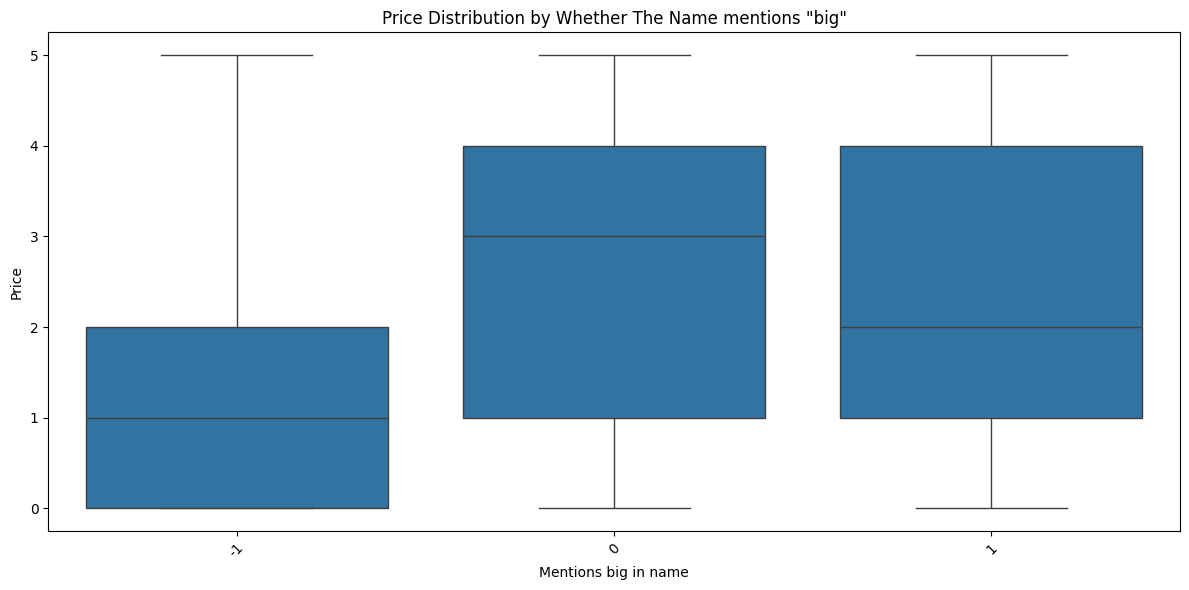

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='name_big', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Name mentions "big"')
plt.xlabel('Mentions big in name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Description

In [31]:
# luxury / budget
airbnb_train['description_luxury'] = np.where(
    airbnb_train['description'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
    np.where(airbnb_train['description'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['description_luxury'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3218735106.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['description'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,


description_luxury
 0    13452
 1     1668
-1      576
Name: count, dtype: int64


/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3218735106.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['description'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)


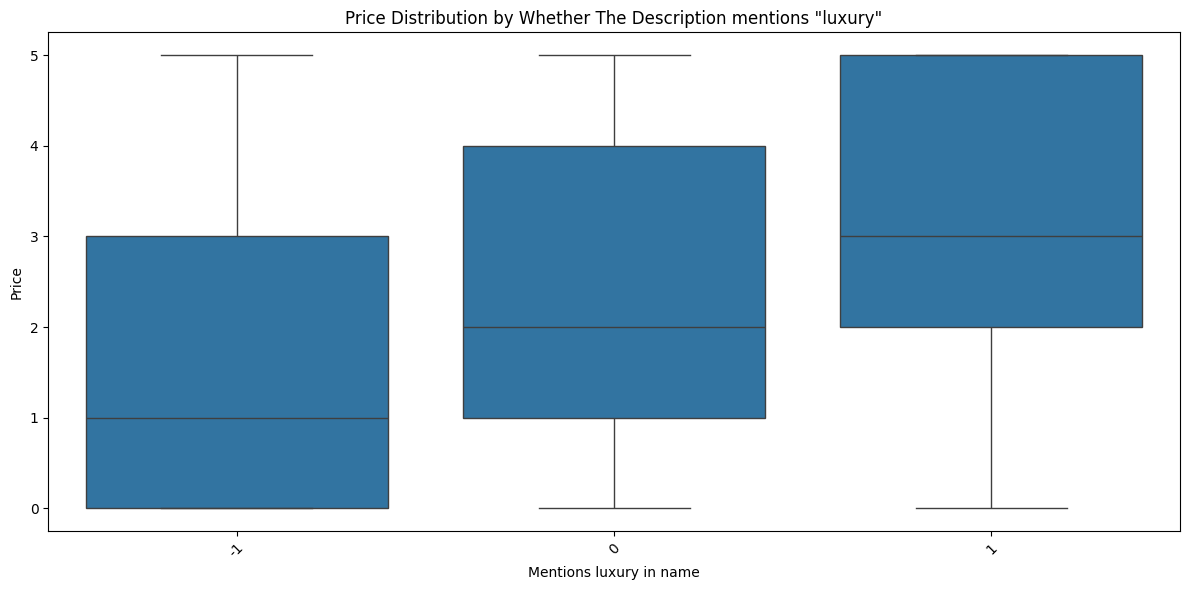

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='description_luxury', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Description mentions "luxury"')
plt.xlabel('Mentions luxury in name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [32]:
# big / small
airbnb_train['description_big'] = np.where(
    airbnb_train['description'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family size|massive)\b', regex=True, case=False), 1,
    np.where(airbnb_train['description'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['description_big'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3212744805.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['description'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family size|massive)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3212744805.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['description'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro)\b', regex=True, case=False), -1, 0)


description_big
 0    10965
 1     4302
-1      429
Name: count, dtype: int64


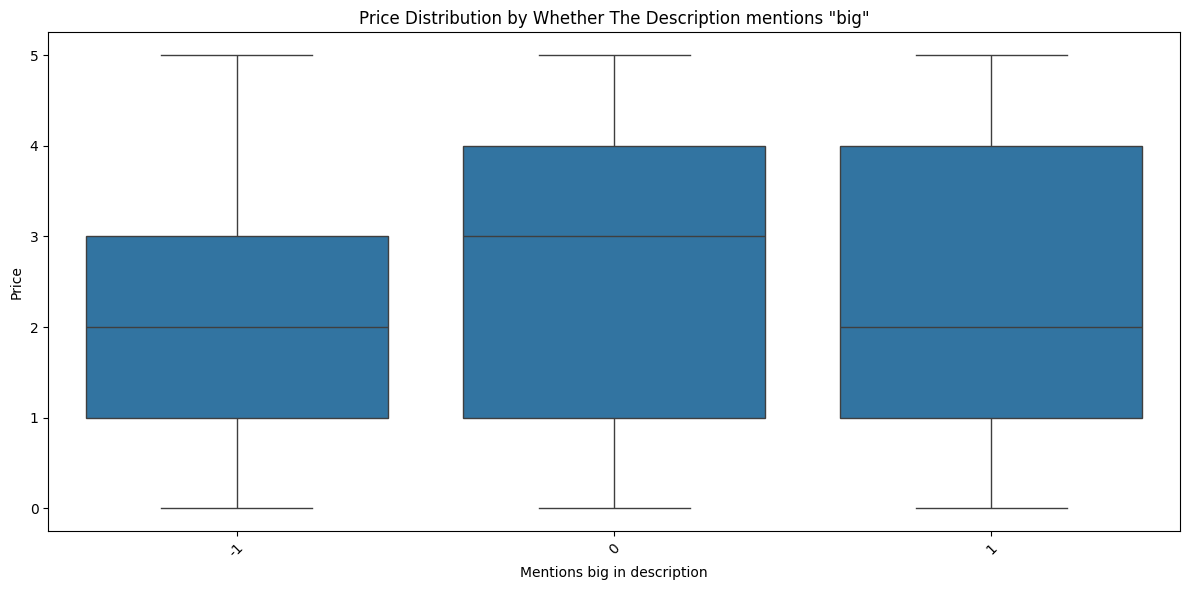

In [114]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='description_big', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Description mentions "big"')
plt.xlabel('Mentions big in description')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [33]:
# distance
airbnb_train['description_convenient'] = np.where(
    airbnb_train['description'].str.contains(r'\b((?<!not\s)convenient|(?<!not\s)close to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)walking distance to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)near (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)easily accessible to (city center|downtown|public transport|metro|train station|bus stop|subway|central area))\b', regex=True, case=False), 1,
    np.where(airbnb_train['description'].str.contains(r'\b(inconvenient|not\sconvenient|far from|away from|distant from|not close to|not near|outside of|remote from|isolated from|hard to reach|inconveniently located|far away from|outskirts of|miles away from|nowhere near|poorly connected to|not accessible to|farther from)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['description_convenient'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3548712953.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['description'].str.contains(r'\b((?<!not\s)convenient|(?<!not\s)close to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)walking distance to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)near (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)easily accessible to (city center|downtown|public transport|metro|train station|bus stop|subway|central area))\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3548712953.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb

description_convenient
 0    12580
-1     1837
 1     1279
Name: count, dtype: int64


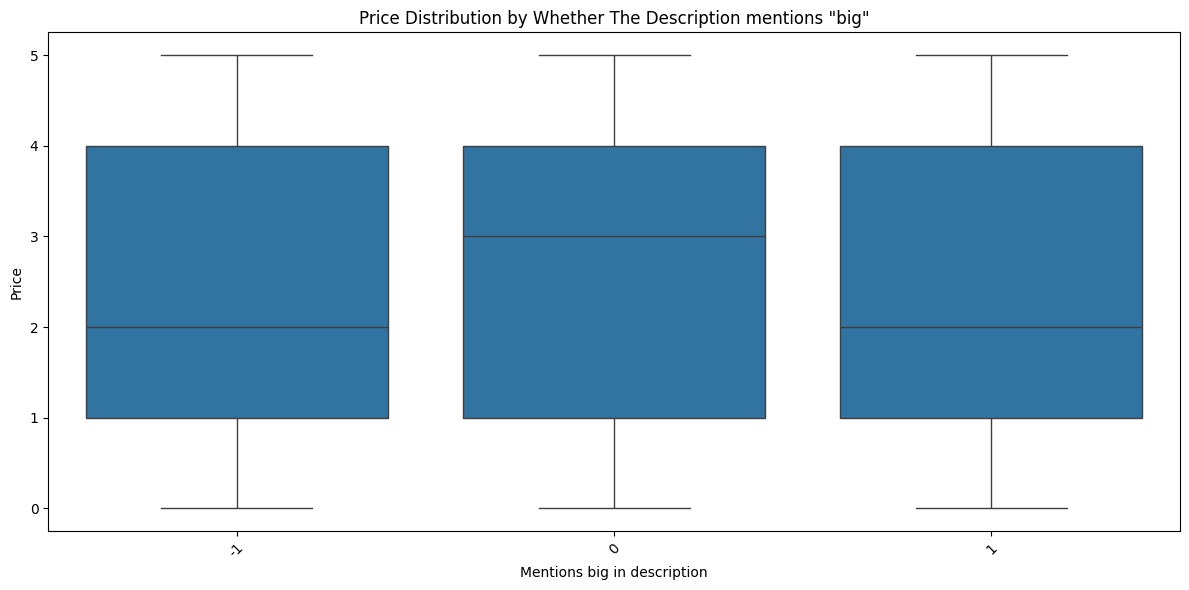

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='description_convenient', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Description mentions "big"')
plt.xlabel('Mentions big in description')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Room type

room_type
Entire home/apt    8592
Single room        7104
Name: count, dtype: int64


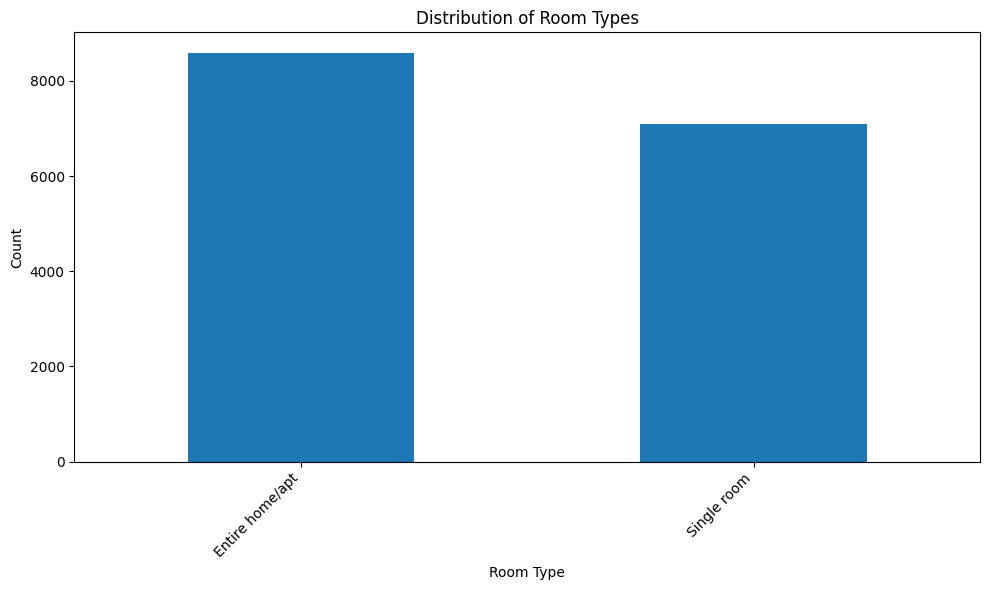

In [69]:
# select balanced and relevant data columns

# convert to entire home/apt and single room
airbnb_train.loc[airbnb_train['room_type'] != 'Entire home/apt', 'room_type'] = 'Single room'
room_type_counts = airbnb_train['room_type'].value_counts()
print(room_type_counts)       


plt.figure(figsize=(10, 6))
property_type_counts = airbnb_train['room_type'].value_counts()
property_type_counts.plot(kind='bar')

# Customize the chart
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

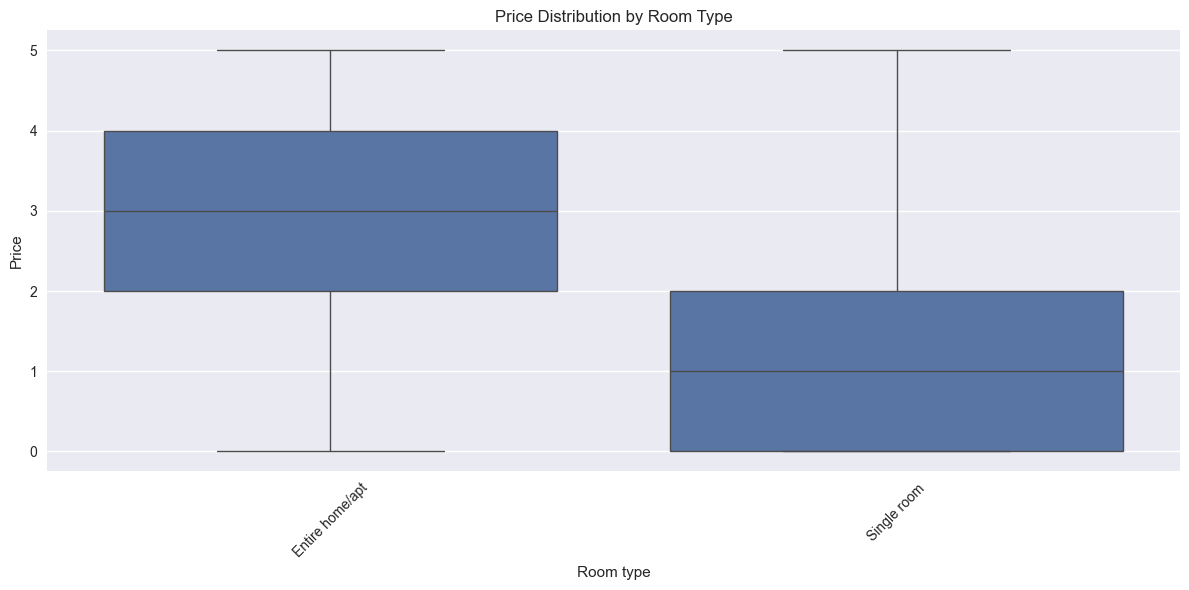

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=airbnb_train)

plt.title('Price Distribution by Room Type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Significant difference.

#### Accommodates

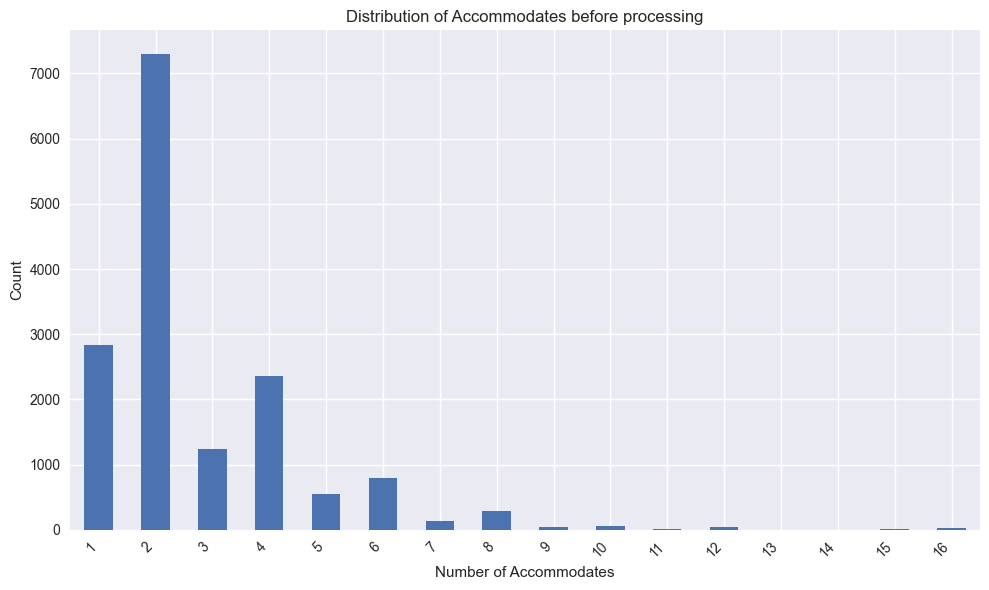

In [124]:
plt.figure(figsize=(10, 6))
property_type_counts = airbnb_train['accommodates'].value_counts().sort_index()
property_type_counts.plot(kind='bar')

# Customize the chart
plt.title('Distribution of Accommodates before processing')
plt.xlabel('Number of Accommodates')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_4787/608692533.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=point_counts, x='accommodates', y='price', size='count', sizes=(20, 500), alpha=0.6, palette='viridis')


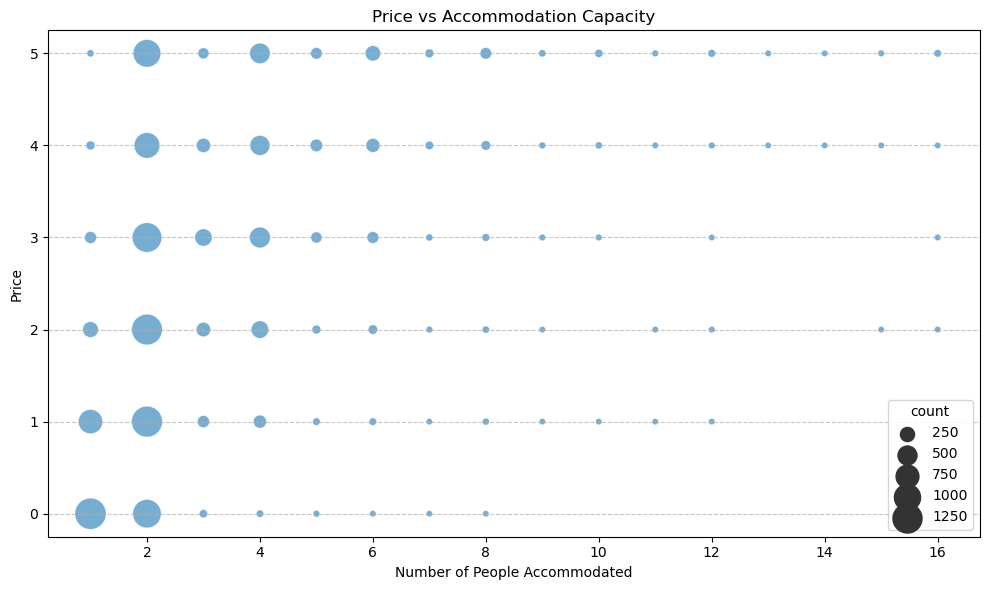

0.46126861051571233


In [20]:
point_counts = airbnb_train.groupby(['accommodates', 'price']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=point_counts, x='accommodates', y='price', size='count', sizes=(20, 500), alpha=0.6, palette='viridis')
plt.xlabel('Number of People Accommodated')
plt.ylabel('Price')
plt.title('Price vs Accommodation Capacity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

corr = airbnb_train['price'].corr(airbnb_train['accommodates'])
print(corr)

There is a moderate positive correlation of 0.461 between the price and the number of people the property accommodates.

#### Amenities

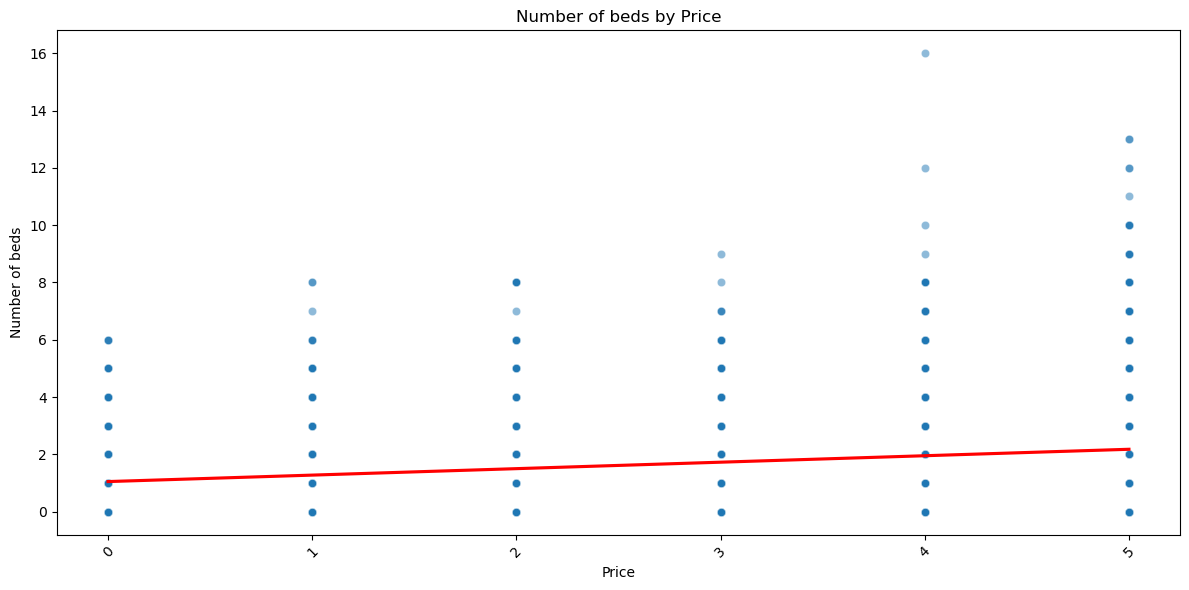

0.34579861598510064


In [34]:
# bathrooms, bedrooms, beds
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='beds', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='beds', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Number of beds by Price')
plt.xlabel('Price')
plt.ylabel('Number of beds')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['price'].corr(airbnb_train['beds'])
print(corr)

In [195]:
corr = airbnb_train['beds'].corr(airbnb_train['accommodates'])
print(corr)

0.7340312536569265


There is a weak positive correlation of 0.346 between number of beds in the property and its price. However, since 'beds' is highly correlated with 'accommodates' (0.734), we can conclude that 'accommodates' is a better predictor of price.

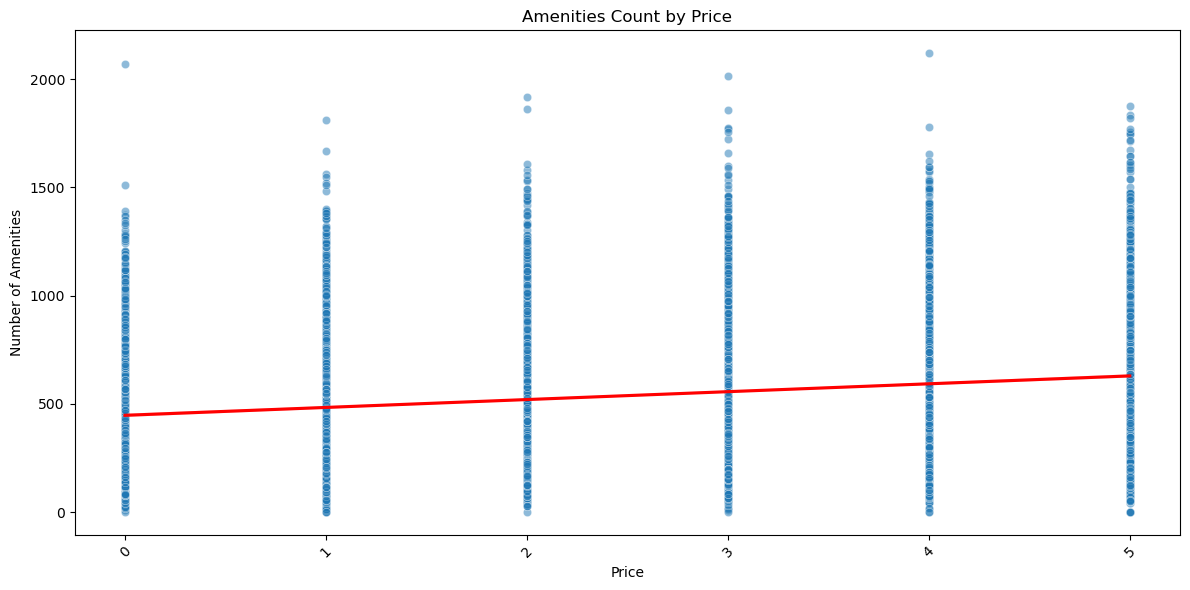

In [23]:
# amenities count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='amenities_count', data=airbnb_train_processed, alpha=0.5)
sns.regplot(x='price', y='amenities_count', data=airbnb_train_processed, 
           scatter=False, color='red')

plt.title('Amenities Count by Price')
plt.xlabel('Price')
plt.ylabel('Number of Amenities')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [224]:
corr = airbnb_train['accommodates'].corr(airbnb_train['amenities_count'])
print(corr)

0.18924919192165315


There is a weak positive correlation between the number of amenities and the price of the property.

#### Location

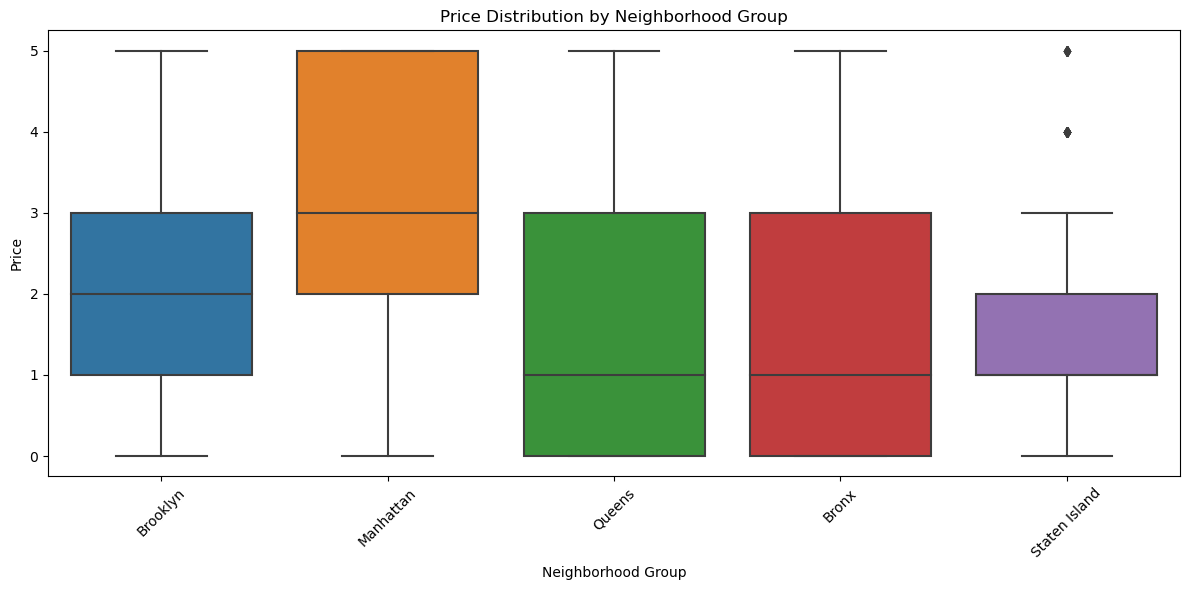

In [24]:
# location
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=airbnb_train)

plt.title('Price Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Although not very statistically significant, Manhattan properties has the highest average price category of 3, followed by Brooklyn (category 2). Queens, Bronx, and Staten Island have the lowest average price category of 1.

#### Availability

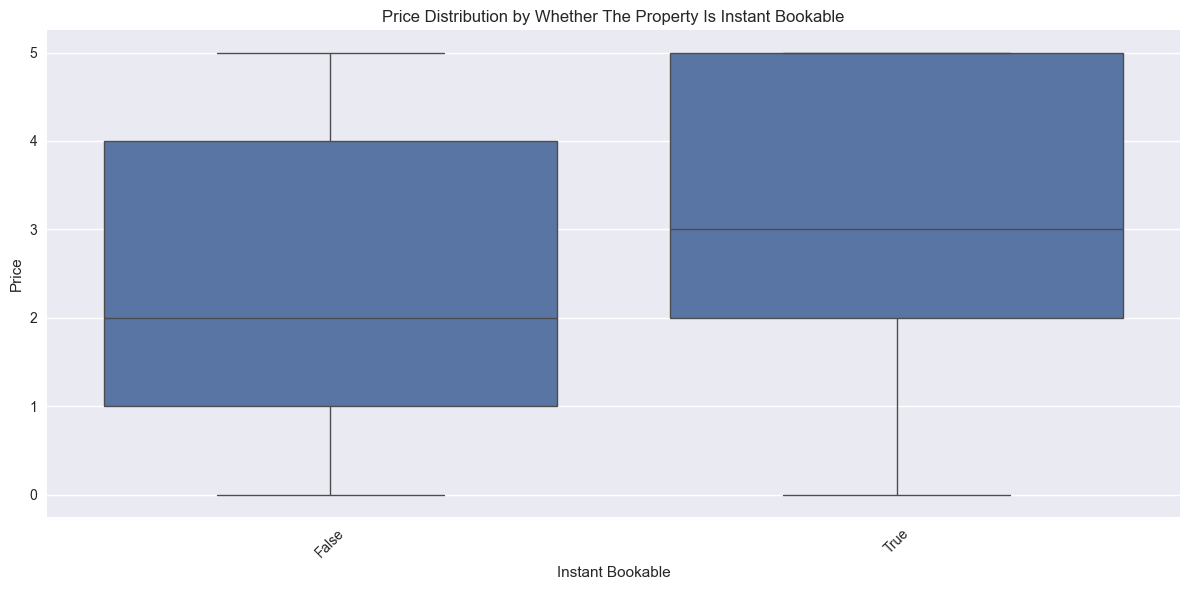

In [228]:
# instant bookable
plt.figure(figsize=(12, 6))
sns.boxplot(x='instant_bookable', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Property Is Instant Bookable')
plt.xlabel('Instant Bookable')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Instant bookable properties have higher price category of 3 on average compared to the average price category of 2 of the non-instant bookable properties.

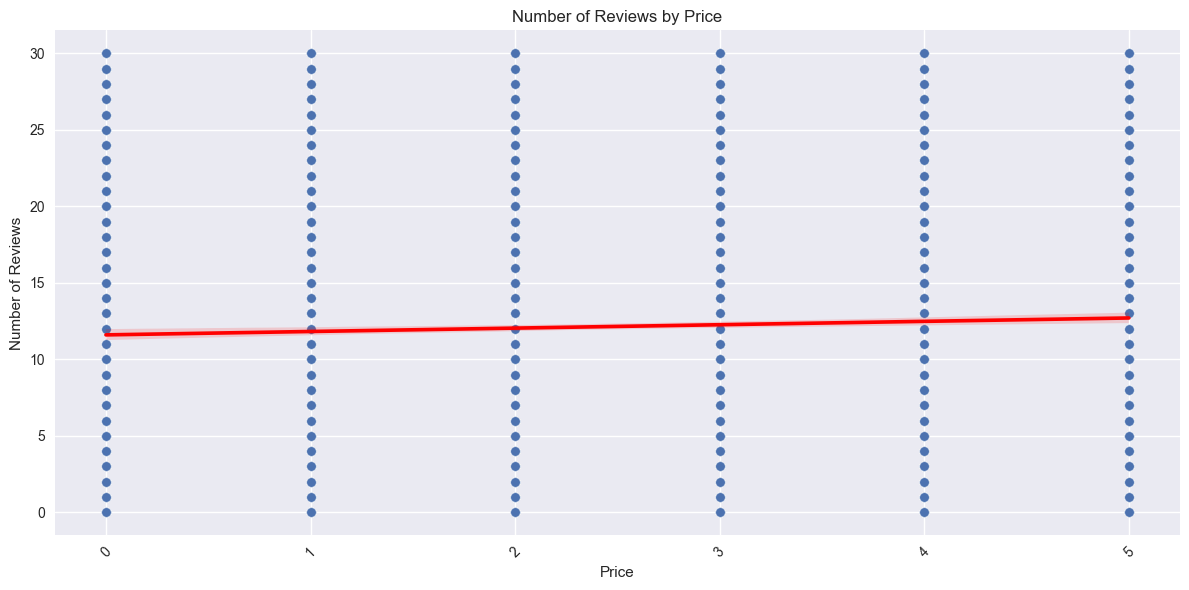

0.030267296907802096


In [234]:
# availability

plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='availability_30', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='availability_30', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Number of Reviews by Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['availability_30'].corr(airbnb_train['price'])
print(corr)

Availability of property does not have a strong correlation with the price of the property.

#### Host since

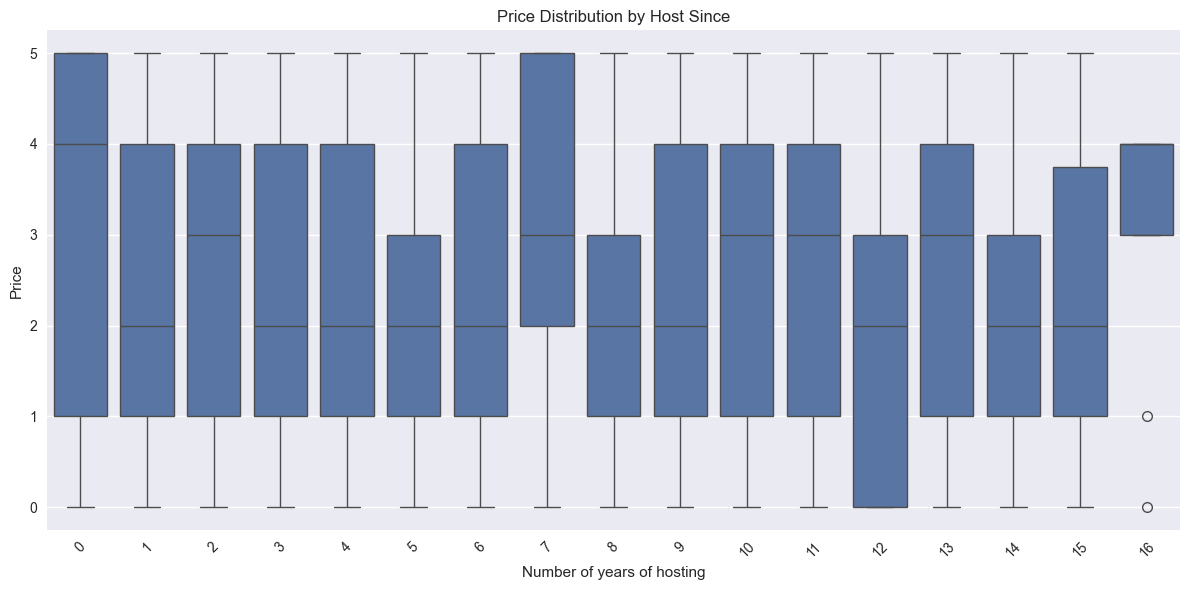

In [148]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='host_years', y='price', data=airbnb_train)

plt.title('Price Distribution by Host Since')
plt.xlabel('Number of years of hosting')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

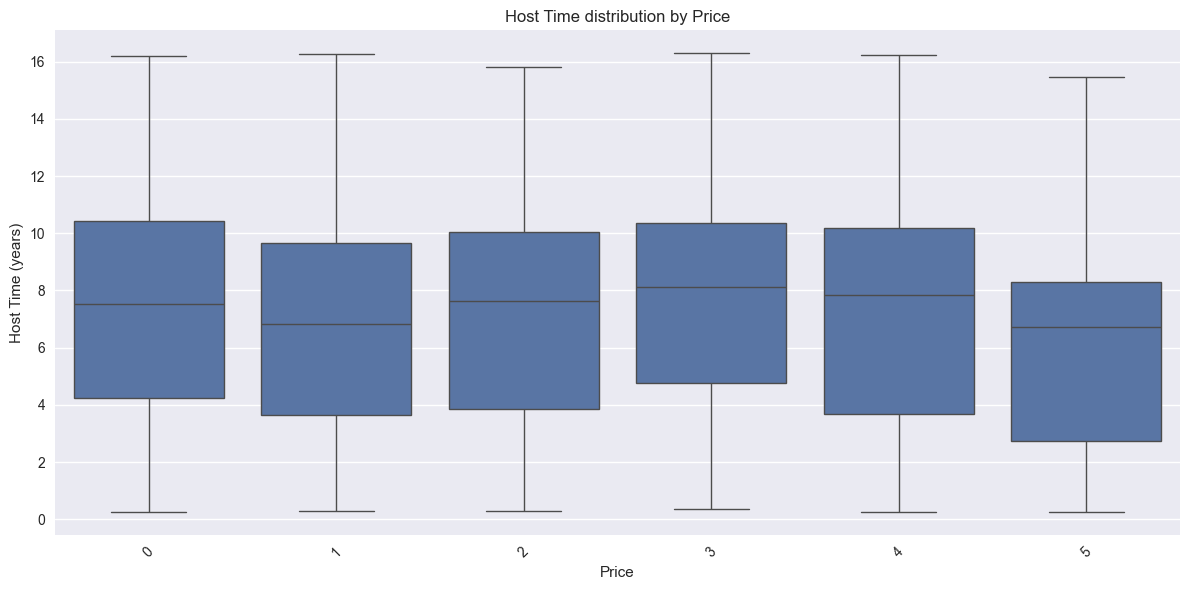

In [150]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='host_time', data=airbnb_train)

plt.title('Host Time distribution by Price')
plt.xlabel('Price')
plt.ylabel('Host Time (years)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [174]:
corr = airbnb_train['price'].corr(airbnb_train['host_years'])
print(corr)

-0.07046031213939005


There is no statistically significant difference among the mean and range of host time in the six price categories.

#### Host property counts

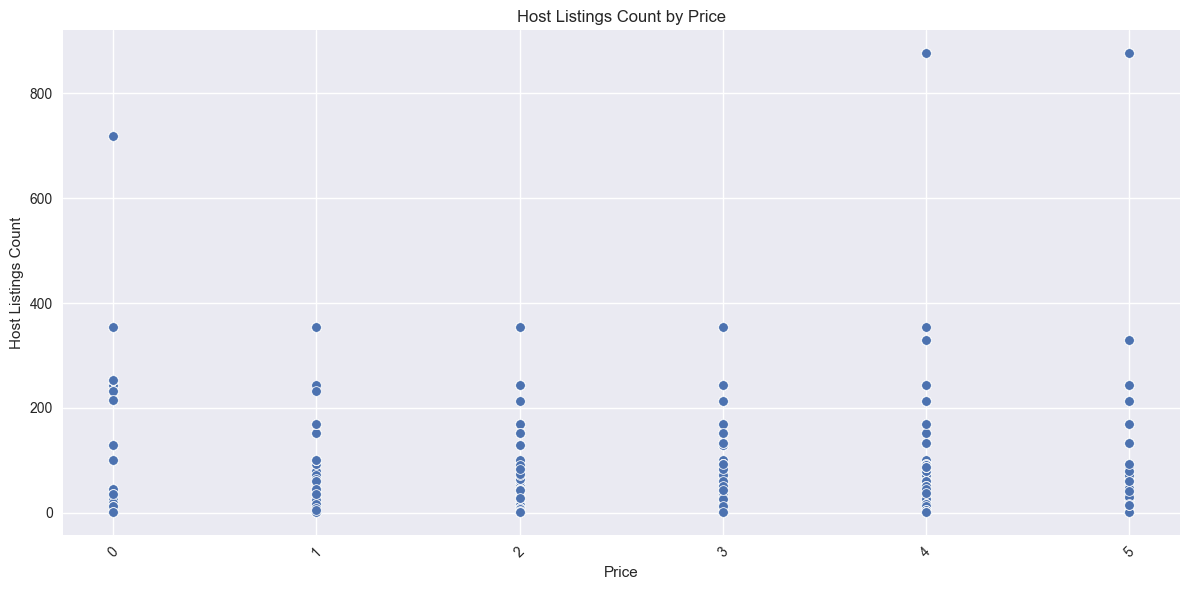

In [160]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='calculated_host_listings_count', data=airbnb_train)

plt.title('Host Listings Count by Price')
plt.xlabel('Price')
plt.ylabel('Host Listings Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Calculated_host_listings_count: Too many outliers, not significant difference across price categories.

#### Property type ratio

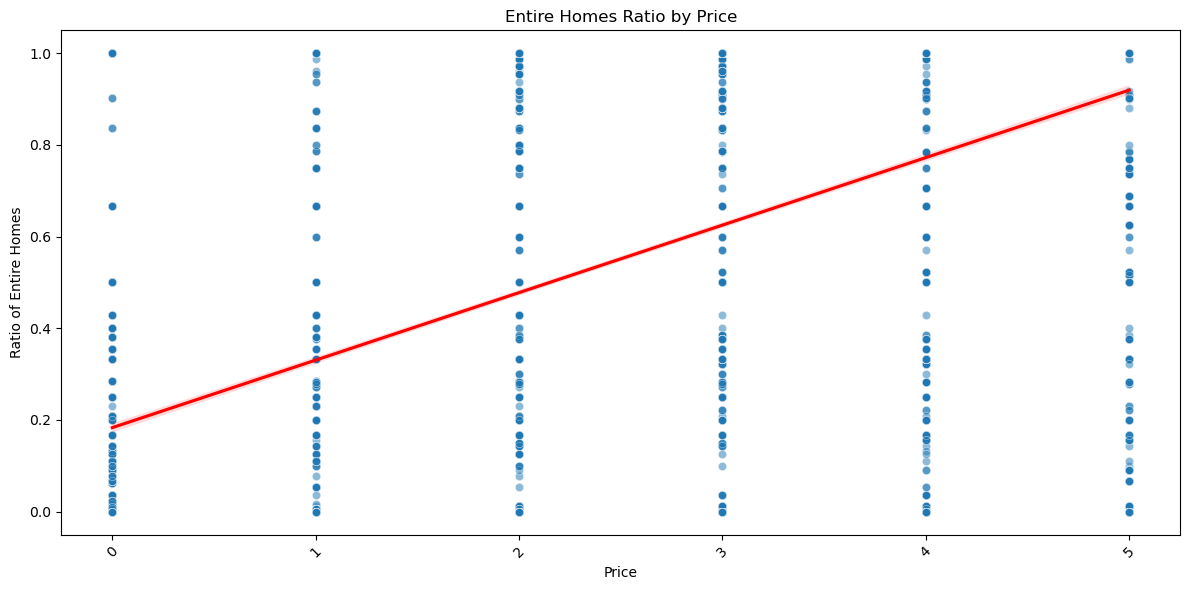

0.5343286871077595


In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='entire_homes_ratio', data=airbnb_train_processed, alpha=0.5)
sns.regplot(x='price', y='entire_homes_ratio', data=airbnb_train_processed, 
           scatter=False, color='red')

plt.title('Entire Homes Ratio by Price')
plt.xlabel('Price')
plt.ylabel('Ratio of Entire Homes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train_processed['entire_homes_ratio'].corr(airbnb_train_processed['price'])
print(corr)

There is a moderate positive correlation of 0.534 between the ratio of entire homes owned by the host and price. In other words, property listings in a higher price range tend to be owned by hosts who have a higher proportion of entire homes compared to private or shared rooms in their portfolio.

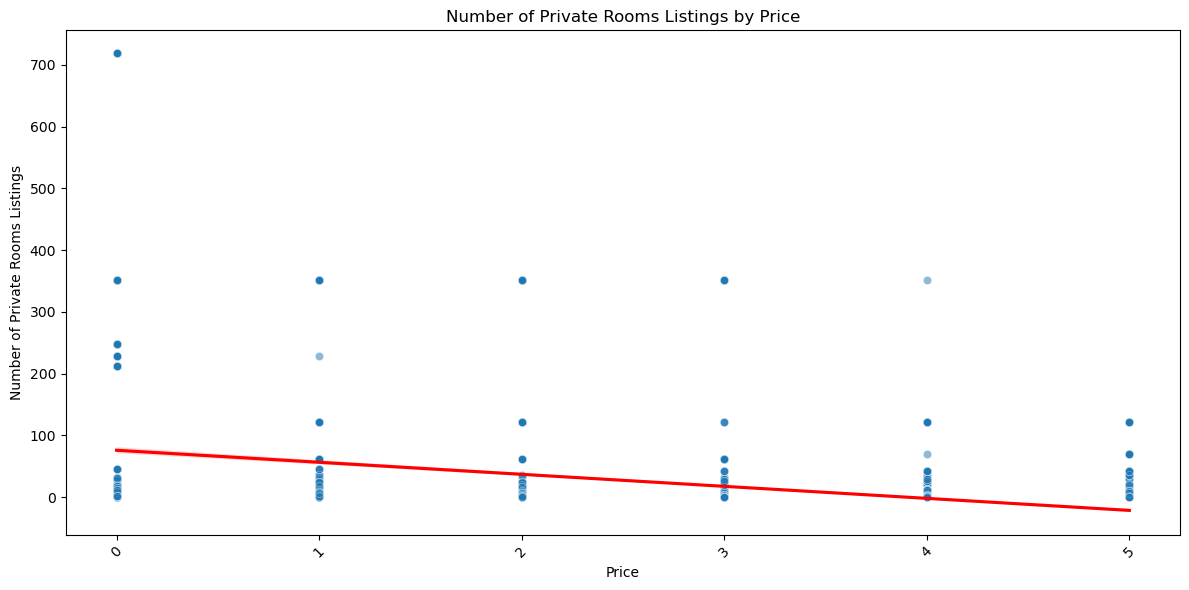

-0.283524512898822


In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='calculated_host_listings_count_private_rooms', data=airbnb_train_processed, alpha=0.5)
sns.regplot(x='price', y='calculated_host_listings_count_private_rooms', data=airbnb_train_processed, 
           scatter=False, color='red')

plt.title('Number of Private Rooms Listings by Price')
plt.xlabel('Price')
plt.ylabel('Number of Private Rooms Listings')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train_processed['calculated_host_listings_count_private_rooms'].corr(airbnb_train_processed['price'])
print(corr)

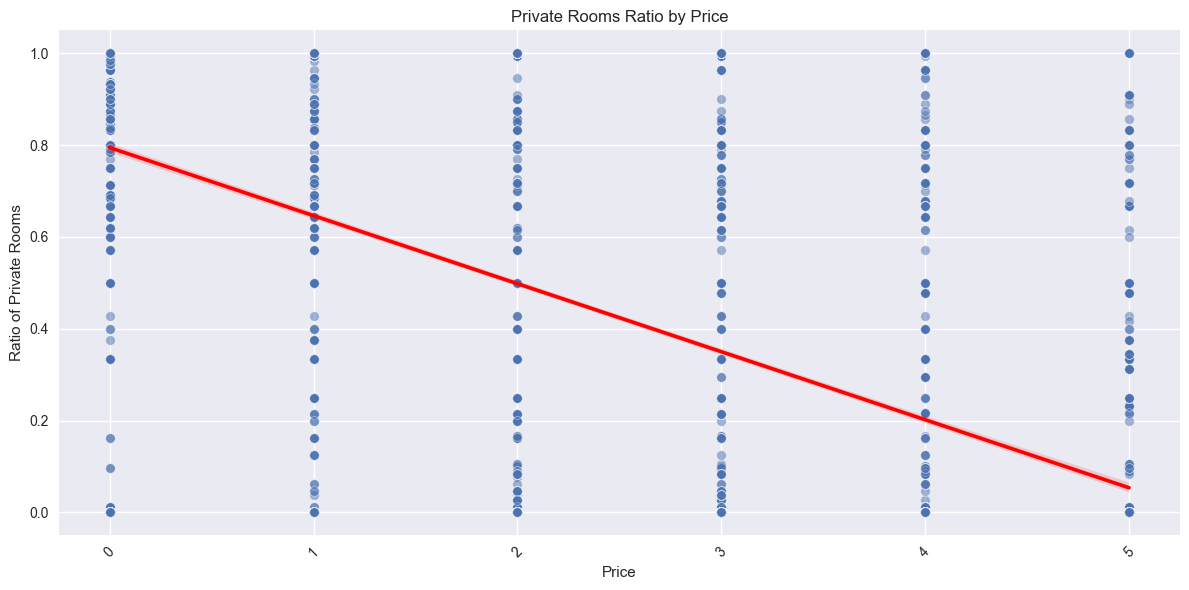

-0.5417929660934192


In [184]:
# private rooms
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='private_rooms_ratio', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='private_rooms_ratio', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Private Rooms Ratio by Price')
plt.xlabel('Price')
plt.ylabel('Ratio of Private Rooms')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['private_rooms_ratio'].corr(airbnb_train['price'])
print(corr)

In a similar vein, there is a moderate negative correlation between private rooms ratio owned by host and the property price.

#### Host identity

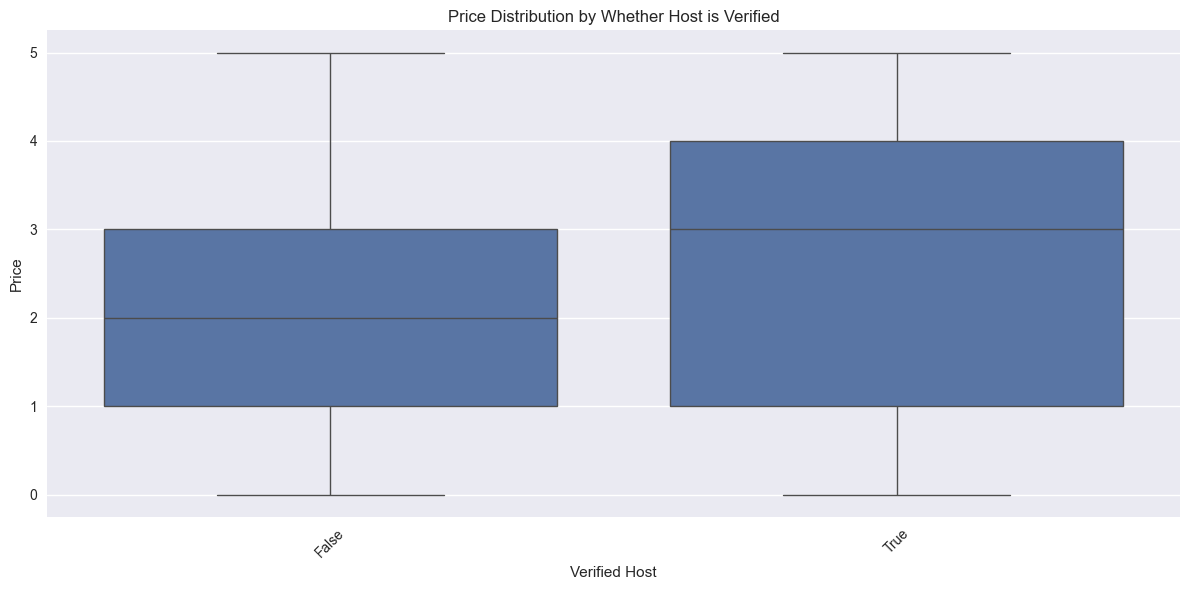

In [177]:
# host is verified

plt.figure(figsize=(12, 6))
sns.boxplot(x='host_identity_verified', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether Host is Verified')
plt.xlabel('Verified Host')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The average price of properties owned by verified hosts is higher in category 3, compared to category 2 for non-verified hosts.

#### Host interaction

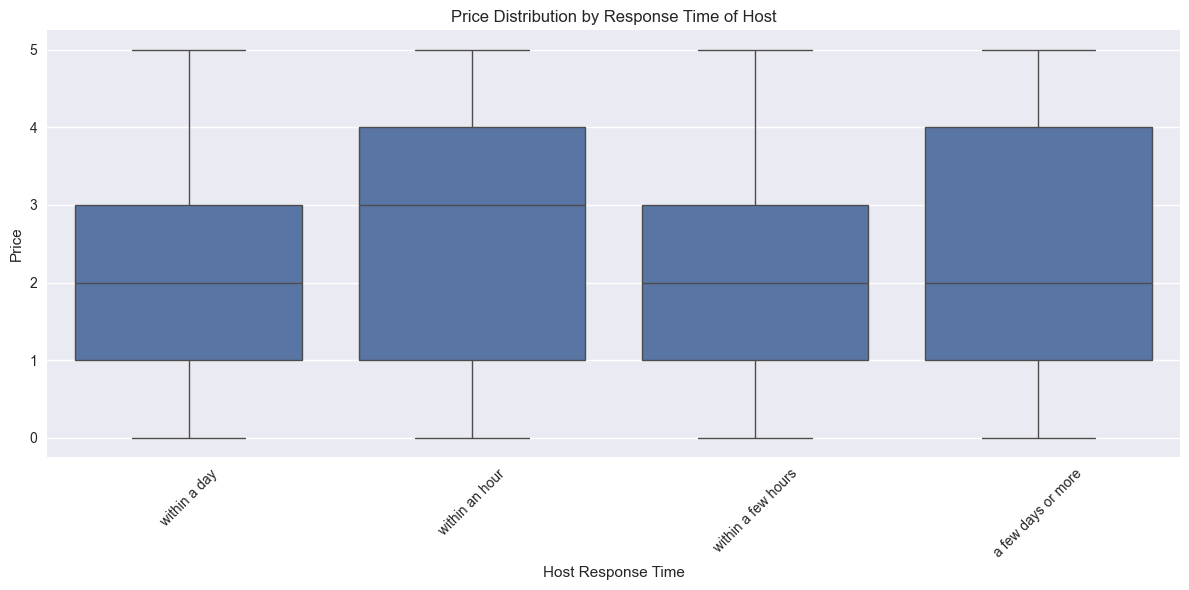

In [268]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='host_response_time', y='price', data=airbnb_train)

plt.title('Price Distribution by Response Time of Host')
plt.xlabel('Host Response Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

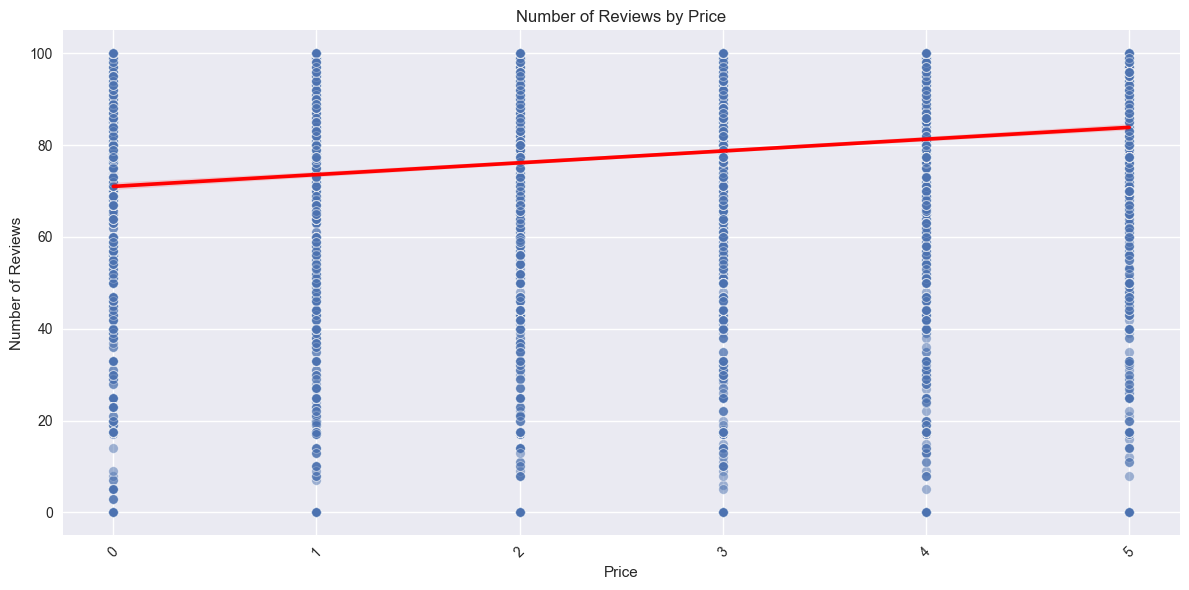

0.1616587208589389


In [272]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='host_acceptance_rate', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='host_acceptance_rate', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Number of Reviews by Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['host_acceptance_rate'].corr(airbnb_train['price'])
print(corr)

In [273]:
corr = airbnb_train['host_acceptance_rate'].corr(airbnb_train['host_response_rate'])
print(corr)

0.538011256521058


Properties with host response time within an hour has the highest average price category of 3. Both host_response_rate and host_acceptance_rate are weakly correlated with price. However, host_response_rate and host_acceptance_rate are moderately correlated with each other.

#### Review scores

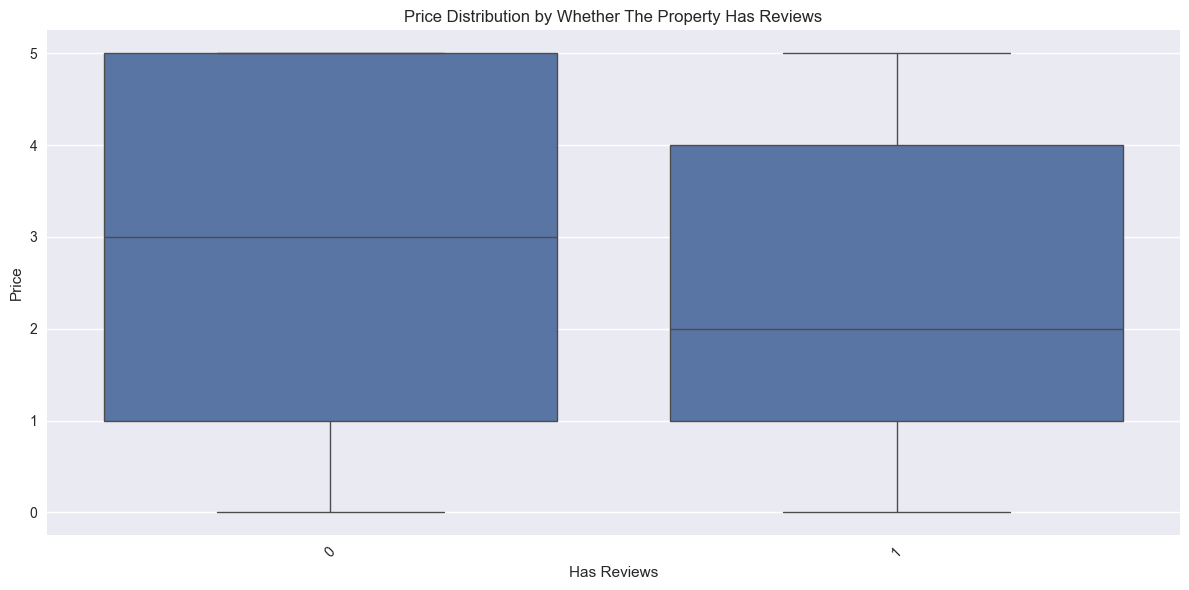

In [202]:
# has reviews

plt.figure(figsize=(12, 6))
sns.boxplot(x='has_reviews', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Property Has Reviews')
plt.xlabel('Has Reviews')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Interestingly, properties that do not have reviews are likely to be slightly more expensive (price category 3 on average compared to price category 2). Could be due to the fact that people who rent more expensive properties are more busy and less likely to leave reviews.

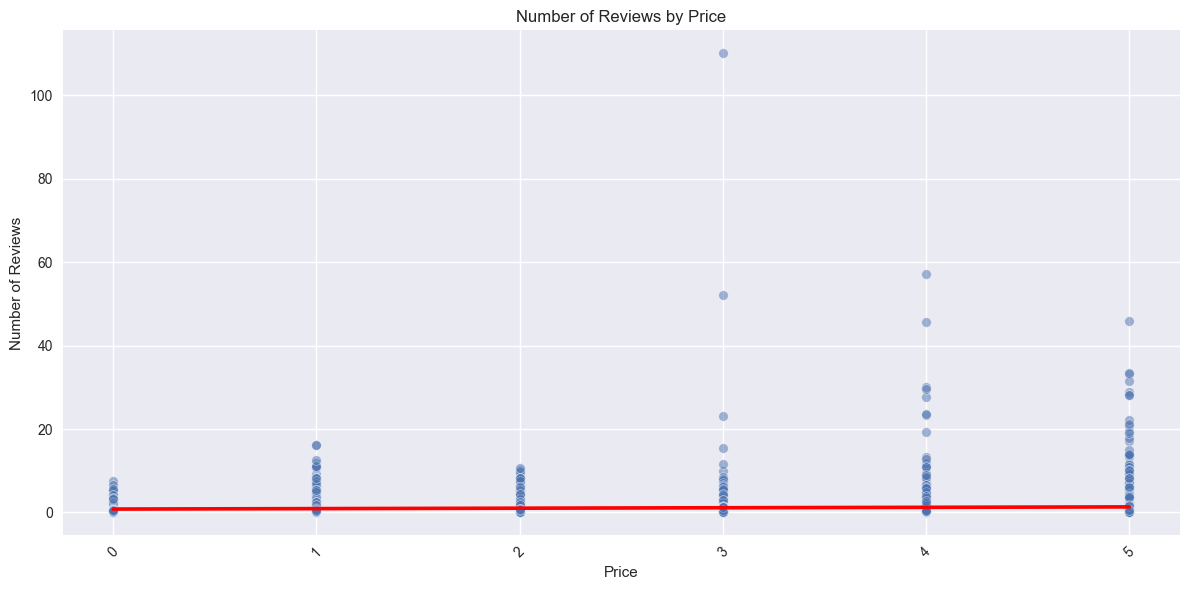

0.09146850291828568


In [218]:
# number of reviews

plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='reviews_per_month', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='reviews_per_month', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Number of Reviews by Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['reviews_per_month'].corr(airbnb_train['price'])
print(corr)

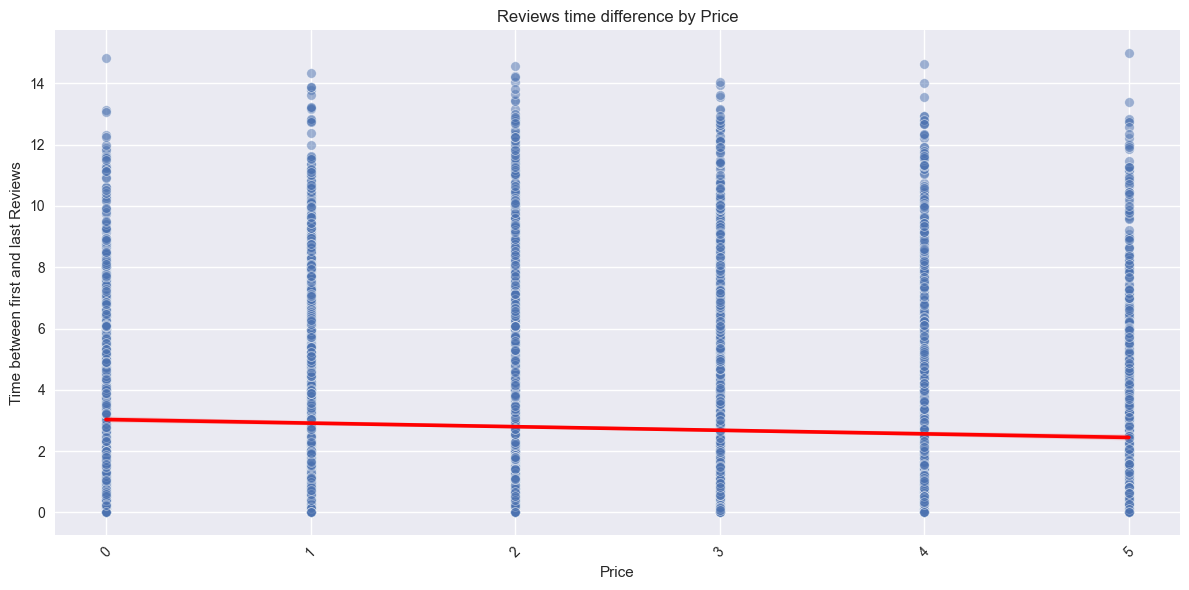

-0.06413288995326044


In [311]:
# time of review
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='review_time_difference', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='review_time_difference', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Reviews time difference by Price')
plt.xlabel('Price')
plt.ylabel('Time between first and last Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['review_time_difference'].corr(airbnb_train['price'])
print(corr)

No significant correlation between number of reviews or review times and price.

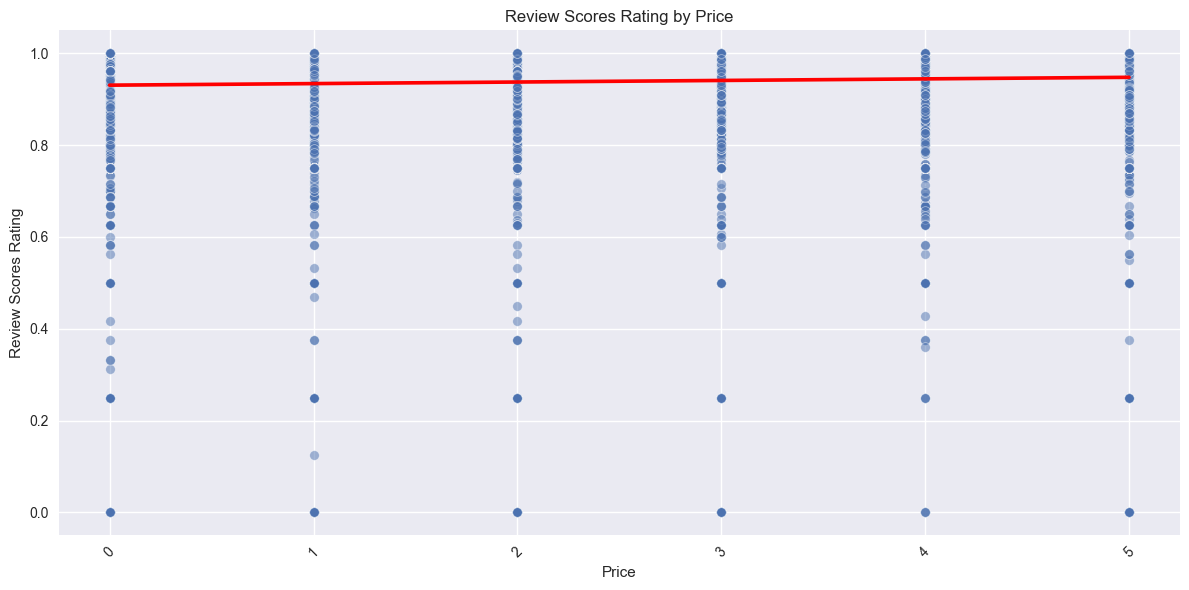

0.059183146803414


In [220]:
# review score and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='review_scores_rating_scaled', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='review_scores_rating_scaled', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Review Scores Rating by Price')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['review_scores_rating_scaled'].corr(airbnb_train['price'])
print(corr)

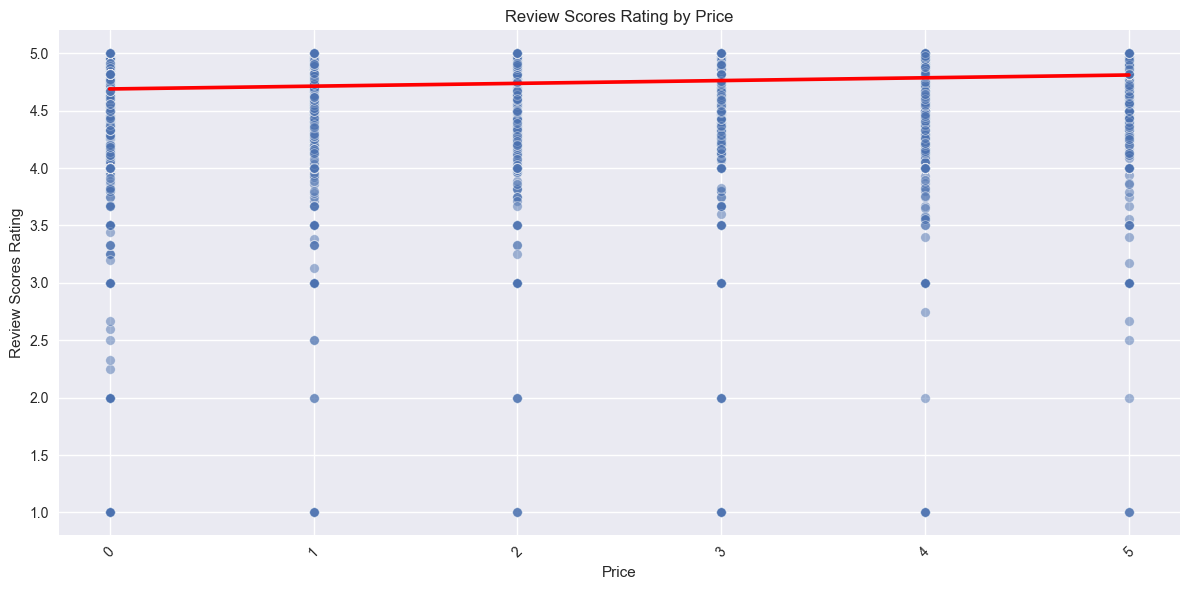

0.12202145731129757


In [223]:
# review score and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='review_scores_location', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='review_scores_location', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Review Scores Rating by Price')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['review_scores_location'].corr(airbnb_train['price'])
print(corr)

Likewise for the other review score columns. Only review score of location has a weak positive correlation with the price. Warrants further investigation of the actual review descriptions, using keyword extraction. 

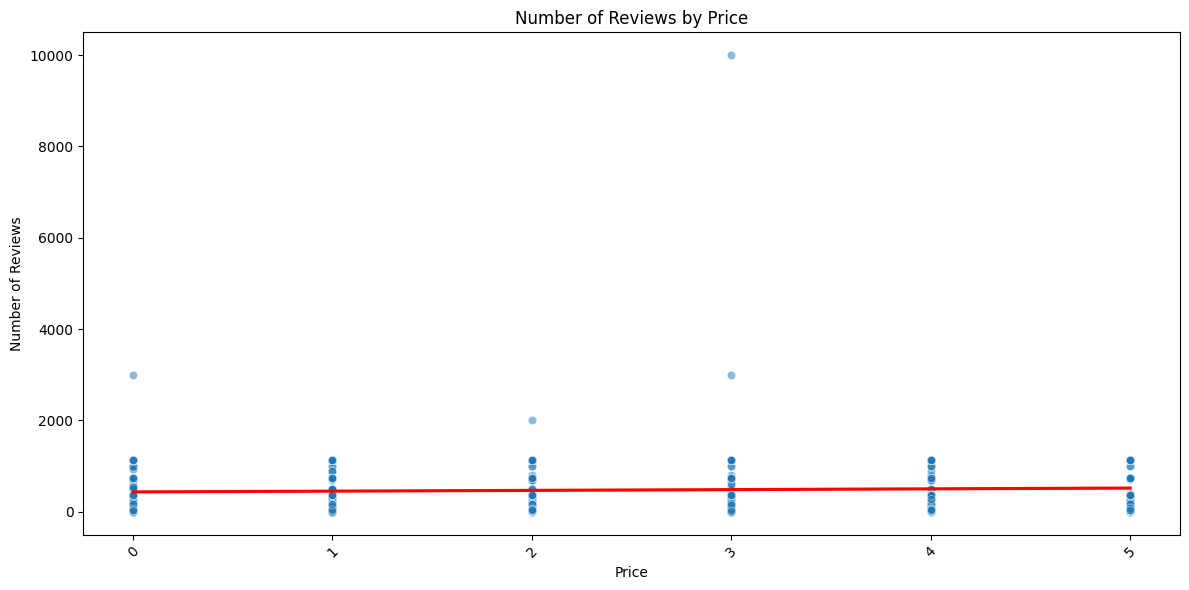

0.06964769475371083


In [135]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='maximum_nights', data=airbnb_train, alpha=0.5)
sns.regplot(x='price', y='maximum_nights', data=airbnb_train, 
           scatter=False, color='red')

plt.title('Number of Reviews by Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

corr = airbnb_train['maximum_nights'].corr(airbnb_train['price'])
print(corr)

### Review description analysis

I further extracted keywords and phrases related to convenience / distance to popular tourist attractions or downtown areas in the city, safety, cleanliness, and noise level. I encode the variables as follows: 1 - positive mention, 0 - did not mention, -1 - negative mention. No significant correlation and there is great imbalance in the data.

In [30]:
re = r'\b(close|far|near|noise|safe|dangerous|convenient|clean|dirty|old|new)\b'
reviews_df = airbnb_train[['price','reviews']]
subset_reviews = reviews_df[reviews_df['reviews'].str.contains(re, case=False, na=False)]
subset_reviews.shape

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_65794/246596405.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  subset_reviews = reviews_df[reviews_df['reviews'].str.contains(re, case=False, na=False)]


(9997, 2)

In [21]:
# safe / dangerous
airbnb_train['reviews_safe'] = np.where(
    airbnb_train['reviews'].str.contains(r'\b((?<!not\s)safe)\b', regex=True, case=False), 1,
    np.where(airbnb_train['reviews'].str.contains(r'\b(dangerous|sketchy|unsafe|not\ssafe)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['reviews_safe'].value_counts())



/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/474588433.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['reviews'].str.contains(r'\b((?<!not\s)safe)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/474588433.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['reviews'].str.contains(r'\b(dangerous|sketchy|unsafe|not\ssafe)\b', regex=True, case=False), -1, 0)


reviews_safe
 0    9243
 1    6291
-1     162
Name: count, dtype: int64


In [22]:
# distance
airbnb_train['reviews_convenient'] = np.where(
    airbnb_train['reviews'].str.contains(r'\b((?<!not\s)convenient|(?<!not\s)close to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)walking distance to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)near (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)easily accessible to (city center|downtown|public transport|metro|train station|bus stop|subway|central area))\b', regex=True, case=False), 1,
    np.where(airbnb_train['reviews'].str.contains(r'\b(inconvenient|not\sconvenient|far from|away from|distant from|not close to|not near|outside of|remote from|isolated from|hard to reach|inconveniently located|far away from|outskirts of|miles away from|nowhere near|poorly connected to|not accessible to|farther from)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['reviews_convenient'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3523342680.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['reviews'].str.contains(r'\b((?<!not\s)convenient|(?<!not\s)close to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)walking distance to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)near (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)easily accessible to (city center|downtown|public transport|metro|train station|bus stop|subway|central area))\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3523342680.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_tra

reviews_convenient
 0    8348
 1    6572
-1     776
Name: count, dtype: int64


In [24]:
# cleanliness
airbnb_train['reviews_clean'] = np.where(
    airbnb_train['reviews'].str.contains(r'\b(?<!not\s)(clean|comfortable|spotless|immaculate|well-kept|neat|sanitized|hygienic)\b', regex=True, case=False), 1,
    np.where(airbnb_train['reviews'].str.contains(r'\b(dirty|filthy|unclean|messy|grimy|unsanitary|dusty|stained|smelly|moldy|disgusting|untidy|gross|trash|junk|cluttered|not clean|not tidy|not sanitized|not neat|not hygienic)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['reviews_clean'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/4138442412.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['reviews'].str.contains(r'\b(?<!not\s)(clean|comfortable|spotless|immaculate|well-kept|neat|sanitized|hygienic)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/4138442412.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['reviews'].str.contains(r'\b(dirty|filthy|unclean|messy|grimy|unsanitary|dusty|stained|smelly|moldy|disgusting|untidy|gross|trash|junk|cluttered|not clean|not tidy|not sanitized|not neat|not hygienic)\b', regex=True, case=False), -1, 0)


reviews_clean
 1    9452
 0    6147
-1      97
Name: count, dtype: int64


In [25]:
# noise level
airbnb_train['reviews_quiet'] = np.where(
    airbnb_train['reviews'].str.contains(r'\b(?<!not\s)(quiet|calm|silent|peaceful)\b', regex=True, case=False), 1,
    np.where(airbnb_train['reviews'].str.contains(r'\b(loud|noisy|chaotic|cannot sleep|not sleep|no sleep)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['reviews_quiet'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/1099101692.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['reviews'].str.contains(r'\b(?<!not\s)(quiet|calm|silent|peaceful)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/1099101692.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['reviews'].str.contains(r'\b(loud|noisy|chaotic|cannot sleep|not sleep|no sleep)\b', regex=True, case=False), -1, 0)


reviews_quiet
 0    7972
 1    7175
-1     549
Name: count, dtype: int64


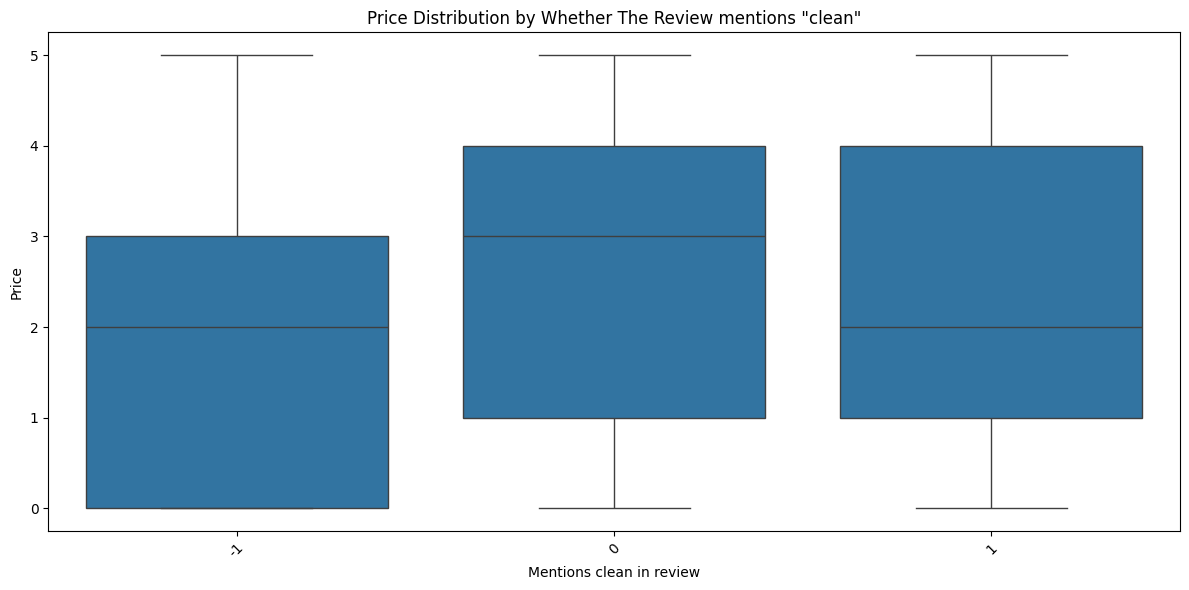

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='reviews_clean', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Review mentions "clean"')
plt.xlabel('Mentions clean in review')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

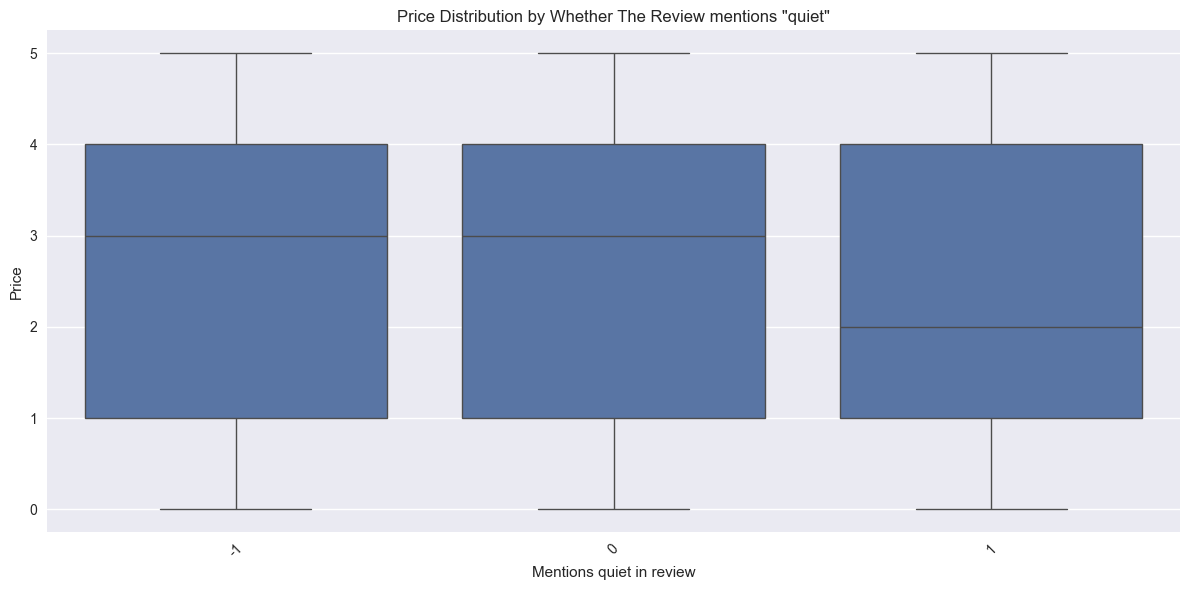

In [346]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='reviews_quiet', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Review mentions "quiet"')
plt.xlabel('Mentions quiet in review')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [26]:
# luxury / budget
airbnb_train['reviews_luxury'] = np.where(
    airbnb_train['reviews'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
    np.where(airbnb_train['reviews'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)
)
print(airbnb_train['reviews_luxury'].value_counts())

/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3578101369.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  airbnb_train['reviews'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
/var/folders/79/22y9knc90290dd7t1yv0s_yc0000gn/T/ipykernel_45155/3578101369.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  np.where(airbnb_train['reviews'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)


reviews_luxury
 0    9792
-1    4029
 1    1875
Name: count, dtype: int64


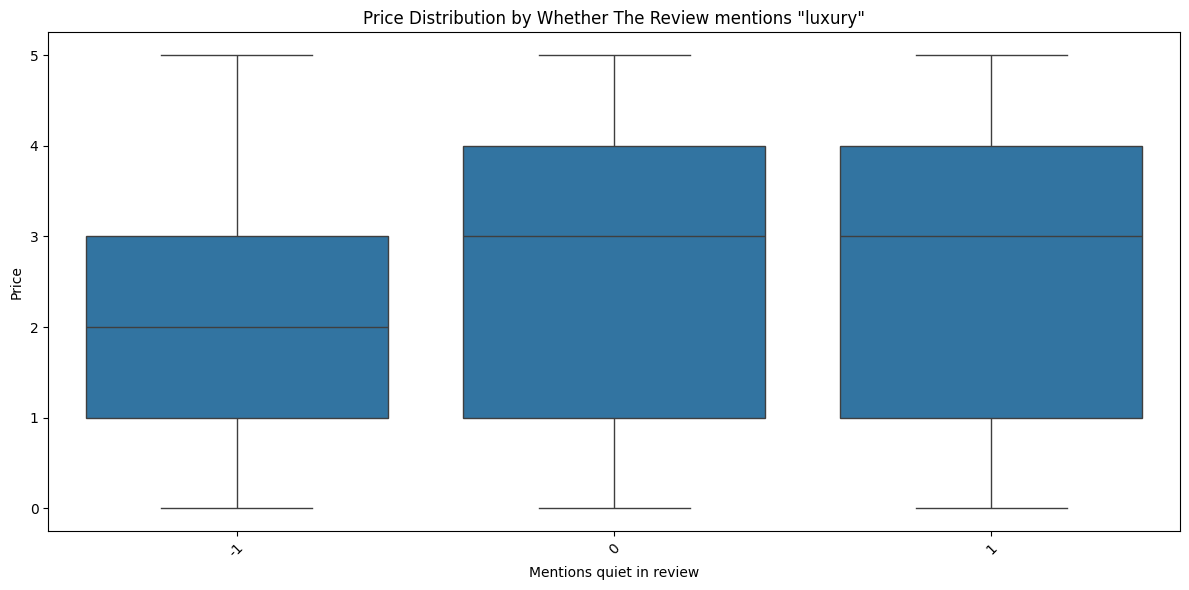

In [123]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='reviews_luxury', y='price', data=airbnb_train)

plt.title('Price Distribution by Whether The Review mentions "luxury"')
plt.xlabel('Mentions quiet in review')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Interestingly, properties with reviews that mentions noise are likely to be more expensive, with an average price category of 3 compared to 2 for quiet properties. This could be explained by the fact that properties with noise complaints in NYC are often located in areas with higher demand and higher prices, such as downtown areas or near tourist attractions.

### Pre-process test dataset in the same way

In [26]:
airbnb_test = pd.read_csv("test.csv")
airbnb_test.head()
airbnb_test.shape

(6727, 51)

In [27]:
airbnb_test.isna().mean()

id                                              0.000000
name                                            0.000000
description                                     0.027204
property_type                                   0.000000
neighbourhood_cleansed                          0.000000
neighbourhood_group_cleansed                    0.000000
latitude                                        0.000000
longitude                                       0.000000
host_since                                      0.000000
host_response_time                              0.141371
host_response_rate                              0.141371
host_acceptance_rate                            0.133343
host_is_superhost                               0.016203
host_listings_count                             0.000000
host_total_listings_count                       0.000000
host_verifications                              0.000000
host_has_profile_pic                            0.000000
host_identity_verified         

In [6]:
# impute missing values
# examine missing beds
beds_known = airbnb_test[airbnb_test['beds'].notna()]
beds_missing = airbnb_test[airbnb_test['beds'].isna()]
print(beds_missing[['beds', 'accommodates']])

corr = airbnb_test['beds'].corr(airbnb_test['accommodates'])
print(corr)

#impute missing beds values
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(beds_known[['accommodates']], beds_known['beds'])
airbnb_test.loc[airbnb_test['beds'].isna(), 'beds'] = model.predict(beds_missing[['accommodates']])

      beds  accommodates
293    NaN             2
671    NaN             4
719    NaN             2
726    NaN             2
933    NaN             2
972    NaN             2
1070   NaN             2
1159   NaN             2
1250   NaN             2
1375   NaN             2
1540   NaN             2
1684   NaN             2
1816   NaN             2
1854   NaN             2
1916   NaN             2
1971   NaN             2
2141   NaN             2
2147   NaN             2
2171   NaN             2
2251   NaN             2
2300   NaN             2
2561   NaN             2
2764   NaN             1
3030   NaN             1
3036   NaN             2
3187   NaN             2
3253   NaN            16
3361   NaN             2
3425   NaN             2
3467   NaN             2
3526   NaN             2
3626   NaN             1
3670   NaN             4
3746   NaN             2
3884   NaN             2
3963   NaN             2
4110   NaN             2
4175   NaN             2
4196   NaN             4


In [28]:
# examine missing reviews
reviews_missing = airbnb_test[airbnb_test["number_of_reviews"]==0]
# reviews_missing.isna().mean()
reviews_present = airbnb_test[airbnb_test["number_of_reviews"]!=0]
reviews_present.isna().mean()

# convert review variables
airbnb_test['has_reviews'] = (airbnb_test['number_of_reviews'] > 0).astype(int)

review_columns = [col for col in airbnb_test.columns if 'review' in col]

# impute missing review score values
for col in review_columns:
    if col=='number_of_reviews' or col=='number_of_reviews_ltm' or col=='number_of_reviews_l30d' or col=='reviews_per_month':
        airbnb_test[col] = airbnb_test[col].fillna(0)
    elif isinstance(airbnb_test[col][0], int) or isinstance(airbnb_test[col][0], float):
        airbnb_test[col] = airbnb_test[col].fillna(airbnb_test[col].median())
    elif isinstance(airbnb_test[col][0], str):
        airbnb_test[col] = airbnb_test[col].fillna("")
airbnb_test[review_columns]

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,reviews,has_reviews
0,28,2,0,2022-10-17 00:00:00,2023-09-17 00:00:00,5.00,5.00,4.96,5.00,5.00,4.96,4.96,1.22,Home was perfect and exactly what we needed to...,1
1,0,0,0,,,4.85,4.88,4.82,4.94,4.94,4.81,4.75,0.00,,0
2,31,0,0,2021-10-17 00:00:00,2022-10-31 00:00:00,4.94,5.00,4.90,4.90,4.97,4.68,4.90,0.88,I would give this place 10 stars if it were op...,1
3,4,3,1,2023-05-29 00:00:00,2024-08-21 00:00:00,4.75,4.50,4.75,5.00,4.50,5.00,4.50,0.26,The front-desk staff was absolutely wonderful ...,1
4,157,2,1,2015-02-22 00:00:00,2024-08-31 00:00:00,4.82,4.89,4.69,4.97,4.96,4.94,4.73,1.35,I really enjoyed staying at Kanae's place. It ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,325,9,0,2015-10-21 00:00:00,2023-11-18 00:00:00,4.71,4.75,4.64,4.88,4.90,4.65,4.71,3.01,Yves Rene hospitality was superior. He made s...,1
6723,11,2,0,2018-08-31 00:00:00,2024-06-01 00:00:00,4.36,4.55,4.55,4.91,4.55,4.91,4.45,0.15,The place was amazing. It is in the center of ...,1
6724,0,0,0,,,4.85,4.88,4.82,4.94,4.94,4.81,4.75,0.00,,0
6725,33,6,0,2021-12-01 00:00:00,2024-07-02 00:00:00,4.88,4.94,4.73,4.94,5.00,4.85,4.76,0.98,Nikita’s place is really well located and it’s...,1


In [29]:
#impute missing bedrooms and bathrooms with mean
airbnb_test['bedrooms'] = airbnb_test['bedrooms'].fillna(airbnb_test['bedrooms'].mean())
airbnb_test['bathrooms'] = airbnb_test['bathrooms'].fillna(airbnb_test['bathrooms'].mean())

In [30]:
# convert host_since
host_time = [0]*len(airbnb_test['host_since'])
host_since = airbnb_test['host_since']

host_time = convert_date_to_timesince(host_since, host_time)
airbnb_test['host_time'] = host_time
print(airbnb_test['host_time'])

host_years = convert_date_to_year(host_since, host_time)
airbnb_test['host_years'] = host_time
print(airbnb_test['host_years'])

# convert first / last review
first_time = [0]*len(airbnb_test['first_review'])
first_review = airbnb_test['first_review']

first_time = convert_date_to_timesince(first_review, first_time)
airbnb_test['first_review_time'] = first_time
print(airbnb_test['first_review_time'])

last_time = [0]*len(airbnb_test['last_review'])
last_review = airbnb_test['last_review']

last_time = convert_date_to_timesince(last_review, last_time)
airbnb_test['last_review_time'] = last_time
print(airbnb_test['last_review_time'])

# impute missing values
airbnb_test['first_review_time'] = airbnb_test['first_review_time'].fillna(airbnb_test['first_review_time'].mean())
airbnb_test['last_review_time'] = airbnb_test['last_review_time'].fillna(airbnb_test['last_review_time'].mean())
print(airbnb_test['first_review_time'])
print(airbnb_test['last_review_time'])

# calculate time difference
airbnb_test['review_time_difference'] = airbnb_test['first_review_time'] - airbnb_test['last_review_time']

0       11.56
1       12.29
2       12.54
3        3.64
4       10.14
        ...  
6722     9.21
6723     8.70
6724    12.29
6725    12.87
6726     7.58
Name: host_time, Length: 6727, dtype: float64
0       11
1       12
2       12
3        3
4       10
        ..
6722     9
6723     8
6724    12
6725    12
6726     7
Name: host_years, Length: 6727, dtype: int64
0       2.11
1        NaN
2       3.11
3       1.50
4       9.76
        ... 
6722    9.10
6723    6.24
6724     NaN
6725    2.99
6726    2.55
Name: first_review_time, Length: 6727, dtype: float64
0       1.19
1        NaN
2       2.07
3       0.27
4       0.24
        ... 
6722    1.02
6723    0.49
6724     NaN
6725    0.40
6726    0.66
Name: last_review_time, Length: 6727, dtype: float64
0       2.110000
1       3.893374
2       3.110000
3       1.500000
4       9.760000
          ...   
6722    9.100000
6723    6.240000
6724    3.893374
6725    2.990000
6726    2.550000
Name: first_review_time, Length: 6727, dtype: float64


In [31]:
# calculate entire_homes_ratio, the ratio of entire_homes to total_listings
airbnb_test_processed['entire_homes_ratio'] = airbnb_test_processed['calculated_host_listings_count_entire_homes'] / airbnb_test_processed['calculated_host_listings_count']
print(airbnb_test_processed['entire_homes_ratio'])
airbnb_test_processed['private_rooms_ratio'] = airbnb_test_processed['calculated_host_listings_count_private_rooms'] / airbnb_test_processed['calculated_host_listings_count']

0       1.0
1       0.0
2       1.0
3       0.5
4       1.0
       ... 
6722    0.5
6723    0.0
6724    0.0
6725    1.0
6726    0.0
Name: entire_homes_ratio, Length: 6727, dtype: float64


In [32]:
# mice for host response time, rate, acceptance rate
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ['host_response_time', 'host_response_rate', 'host_acceptance_rate']

ordinal_mapping = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}
airbnb_test['host_response_time'] = airbnb_test['host_response_time'].map(ordinal_mapping)

mice_imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_airbnb_test = mice_imputer.fit_transform(airbnb_test[columns_to_impute])

airbnb_test[columns_to_impute] = imputed_airbnb_test

reverse_mapping = {v: k for k, v in ordinal_mapping.items()}
airbnb_test['host_response_time'] = airbnb_test['host_response_time'].round().map(reverse_mapping)

In [34]:
# amenities count
airbnb_test['amenities_count'] = airbnb_test['amenities'].apply(lambda x: len(x))
amenities_counts = airbnb_test['amenities_count'].value_counts()
amenities_counts

amenities_count
95      52
85      39
494     36
117     35
207     31
        ..
1532     1
1258     1
1033     1
1289     1
1322     1
Name: count, Length: 1255, dtype: int64

In [36]:
# safe / dangerous
airbnb_test['reviews_safe'] = np.where(
    airbnb_test['reviews'].str.contains(r'\b((?<!not\s)safe)\b', regex=True, case=False), 1,
    np.where(airbnb_test['reviews'].str.contains(r'\b(dangerous|sketchy|unsafe|not\ssafe)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['reviews_safe'].value_counts())

reviews_safe
 0    3988
 1    2676
-1      63
Name: count, dtype: int64


In [37]:
# distance
airbnb_test['reviews_convenient'] = np.where(
    airbnb_test['reviews'].str.contains(r'\b((?<!not\s)convenient|(?<!not\s)close to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)walking distance to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)near (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)easily accessible to (city center|downtown|public transport|metro|train station|bus stop|subway|central area))\b', regex=True, case=False), 1,
    np.where(airbnb_test['reviews'].str.contains(r'\b(inconvenient|not\sconvenient|far from|away from|distant from|not close to|not near|outside of|remote from|isolated from|hard to reach|inconveniently located|far away from|outskirts of|miles away from|nowhere near|poorly connected to|not accessible to|farther from)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['reviews_convenient'].value_counts())

reviews_convenient
 0    3620
 1    2753
-1     354
Name: count, dtype: int64


In [38]:
# cleanliness
airbnb_test['reviews_clean'] = np.where(
    airbnb_test['reviews'].str.contains(r'\b(?<!not\s)(clean|comfortable|spotless|immaculate|well-kept|neat|sanitized|hygienic)\b', regex=True, case=False), 1,
    np.where(airbnb_test['reviews'].str.contains(r'\b(dirty|filthy|unclean|messy|grimy|unsanitary|dusty|stained|smelly|moldy|disgusting|untidy|gross|trash|junk|cluttered|not clean|not tidy|not sanitized|not neat|not hygienic)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['reviews_clean'].value_counts())

reviews_clean
 1    3960
 0    2722
-1      45
Name: count, dtype: int64


In [39]:
# noise level
airbnb_test['reviews_quiet'] = np.where(
    airbnb_test['reviews'].str.contains(r'\b(?<!not\s)(quiet|calm|silent|peaceful)\b', regex=True, case=False), 1,
    np.where(airbnb_test['reviews'].str.contains(r'\b(loud|noisy|chaotic|cannot sleep|not sleep|no sleep)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['reviews_quiet'].value_counts())

reviews_quiet
 0    3472
 1    3029
-1     226
Name: count, dtype: int64


In [40]:
# luxury / budget
airbnb_test['name_luxury'] = np.where(
    airbnb_test['name'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
    np.where(airbnb_test['name'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['name_luxury'].value_counts())

name_luxury
 0    6334
 1     330
-1      63
Name: count, dtype: int64


In [41]:
# extract info from description
# luxury / budget
airbnb_test['description_luxury'] = np.where(
    airbnb_test['description'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
    np.where(airbnb_test['description'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['description_luxury'].value_counts())

# big / small
airbnb_test['description_big'] = np.where(
    airbnb_test['description'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family size|massive)\b', regex=True, case=False), 1,
    np.where(airbnb_test['description'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['description_big'].value_counts())

# distance
airbnb_test['description_convenient'] = np.where(
    airbnb_test['description'].str.contains(r'\b((?<!not\s)convenient|(?<!not\s)close to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)walking distance to (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)near (city center|downtown|public transport|metro|train station|bus stop|subway|central area)|(?<!not\s)easily accessible to (city center|downtown|public transport|metro|train station|bus stop|subway|central area))\b', regex=True, case=False), 1,
    np.where(airbnb_test['description'].str.contains(r'\b(inconvenient|not\sconvenient|far from|away from|distant from|not close to|not near|outside of|remote from|isolated from|hard to reach|inconveniently located|far away from|outskirts of|miles away from|nowhere near|poorly connected to|not accessible to|farther from)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['description_convenient'].value_counts())

description_luxury
 0    5733
 1     723
-1     271
Name: count, dtype: int64
description_big
 0    4678
 1    1881
-1     168
Name: count, dtype: int64
description_convenient
 0    5408
-1     787
 1     532
Name: count, dtype: int64


In [42]:
# big / small
airbnb_test['reviews_big'] = np.where(
    airbnb_test['reviews'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family size|massive)\b', regex=True, case=False), 1,
    np.where(airbnb_test['reviews'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['reviews_big'].value_counts())

# luxury / budget
airbnb_test['reviews_luxury'] = np.where(
    airbnb_test['reviews'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
    np.where(airbnb_test['reviews'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['reviews_luxury'].value_counts())

reviews_big
 0    3387
 1    3021
-1     319
Name: count, dtype: int64
reviews_luxury
 0    4199
-1    1736
 1     792
Name: count, dtype: int64


In [43]:
# extract info from the name
# new / old
airbnb_test['name_new'] = np.where(
    airbnb_test['name'].str.contains(r'\b((?<!not\s)new|newly|fresh|freshly|renovated|completed)\b', regex=True, case=False), 1,
    np.where(airbnb_test['name'].str.contains(r'\b(old|classic|historic|traditional|vintage|seasoned|retro|rustic|heritage|historical)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['name_new'].value_counts())

# luxury / budget
airbnb_test['name_luxury'] = np.where(
    airbnb_test['name'].str.contains(r'\b((?<!not\s)luxury|fancy|high-end|premium|upscale|elite|lavish|luxurious|designer|first-class|mansion|villa|exclusive)\b', regex=True, case=False), 1,
    np.where(airbnb_test['name'].str.contains(r'\b(affordable|economy|economic|value|simple|basic|modest|budget)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['name_luxury'].value_counts())

# big / small
airbnb_test['name_big'] = np.where(
    airbnb_test['name'].str.contains(r'\b((?<!not\s)big|spacious|large|oversized|expansive|roomy|extra-large|family|massive|full-sized)\b', regex=True, case=False), 1,
    np.where(airbnb_test['name'].str.contains(r'\b(compact|small|petite|minimalist|space-efficient|micro|individual|one-person|single)\b', regex=True, case=False), -1, 0)
)
print(airbnb_test['name_big'].value_counts())

name_new
 0    6197
 1     408
-1     122
Name: count, dtype: int64
name_luxury
 0    6334
 1     330
-1      63
Name: count, dtype: int64
name_big
 0    6075
 1     597
-1      55
Name: count, dtype: int64


In [44]:
# scale review scores
review_scores = [col for col in airbnb_test.columns if col.startswith('review_scores')]
for col in review_scores:
    new_col_name = f"{col}_scaled"
    airbnb_test[new_col_name] = airbnb_test[col] * 10 
airbnb_test['review_scores_rating_scaled']

0       50.0
1       48.5
2       49.4
3       47.5
4       48.2
        ... 
6722    47.1
6723    43.6
6724    48.5
6725    48.8
6726    47.4
Name: review_scores_rating_scaled, Length: 6727, dtype: float64

In [46]:
# impute missing values for bathrooms and bedrooms
airbnb_test_processed['bathrooms'] = airbnb_test_processed['bathrooms'].fillna(airbnb_test_processed['bathrooms'].mean())
airbnb_test_processed['bedrooms'] = airbnb_test_processed['bedrooms'].fillna(airbnb_test_processed['bedrooms'].mean())

### Export datasets

In [34]:
airbnb_train.to_csv('train_augmented_full.csv', index=False)

In [8]:
airbnb_test_processed.to_csv('test_augmented_full.csv', index=False)

### Feature Importance